In [45]:
import pandas as pd # Data Manipulation
import numpy as np # Pre-requisite for Pandas
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Plotting
from sklearn.preprocessing import LabelEncoder # Label Encoder for Prediction (Not used)
from sklearn.model_selection import train_test_split # Training model for Prediction (Original idea was Random Forest)
from catboost import CatBoostRegressor # Open Source Gradient Boosting Algorithm for Prediction (Used)

In [46]:
df = pd.read_excel("DataMini.xlsx") # Read the excel sheet into a dataframe

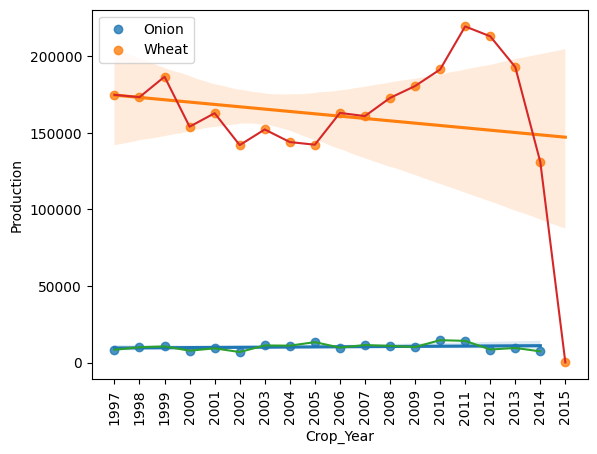

In [47]:
# Production should be in Lakh Tonnes and Area should be in Million Hectares
df = df[df.Production != '='] # Remove any row containing '='
df.Production = df.Production.astype(float) # Parse the 'Production' row as a float

onion_data = df[df['Crop'] == 'Onion'] # Find the data rows containing 'Onion' in 'Crop' column
wheat_data = df[df['Crop'] == 'Wheat'] # Find the data rows containing 'Wheat' in 'Crop' column

onion_prod = onion_data.groupby("Crop_Year").mean(numeric_only=True)['Production'] # Mean Onion Production per year
wheat_prod = wheat_data.groupby("Crop_Year").mean(numeric_only=True)['Production'] # Mean Wheat Production per year

years_onion_prod = onion_prod.index # 'Years' index for Onion
years_onion_prod = pd.Series(years_onion_prod) # Make the 'Years' into a 1D date series label
years_wheat_prod = wheat_prod.index # 'Years' index for Wheat
years_wheat_prod = pd.Series(years_wheat_prod) # Make the 'Years' into a 1D date series label

onion_prod_df = pd.DataFrame(data=onion_prod,index=years_onion_prod) # Onion Production Dataframe (Years, Production)
wheat_prod_df = pd.DataFrame(data=wheat_prod,index=years_wheat_prod) # Wheat Production Dataframe (Years, Production)

sns.regplot(data=onion_prod_df,x=onion_prod_df.index,y=onion_prod_df.Production, label='Onion'); # Blue Color Onion Regression + Scatter Plot
sns.regplot(data=wheat_prod_df,x=wheat_prod_df.index,y=wheat_prod_df.Production, label='Wheat'); # Orange Color Wheat Regression + Scatter Plot

sns.lineplot(data=onion_prod_df,x=onion_prod_df.index,y=onion_prod_df.Production); # Blue Color Onion Line Plot
sns.lineplot(data=wheat_prod_df,x=wheat_prod_df.index,y=wheat_prod_df.Production); # Orange Color Wheat Line Plot

# plt.gca().set_xticks(onion_prod_df.index); # Use original 'Years' from the onion production dataframe
plt.gca().set_xticks(wheat_prod_df.index); # Use original data 'Years' from the wheat production dataframe

plt.xticks(rotation=90); # Rotate the X label by 90 degree
# Very erratic data for wheat, somehow also very few 2015 data as well, causing the unmarked drop.

In [48]:
onion_states = pd.DataFrame(onion_data.State_Name.unique(), columns=['State Name']) # States growing Onions
wheat_states = pd.DataFrame(wheat_data.State_Name.unique(), columns=['State Name']) # States growing Wheat

In [49]:
onion_states # Print Onion growing states

State Name
0          Maharashtra
1              Gujarat
2            Karnataka
3       Andhra Pradesh
4            Rajasthan
5          Uttarakhand
6       Madhya Pradesh
7           Tamil Nadu
8               Odisha
9           Telangana 
10       Uttar Pradesh
11             Haryana
12               Bihar
13        Chhattisgarh
14               Assam
15             Manipur
16           Jharkhand
17    Himachal Pradesh
18  Jammu and Kashmir 
19          Puducherry
20          Chandigarh

In [50]:
wheat_states # Print Wheat Growing States

State Name
0                   Punjab
1            Uttar Pradesh
2                  Haryana
3           Madhya Pradesh
4                Rajasthan
5                  Gujarat
6              Maharashtra
7                    Bihar
8              West Bengal
9              Uttarakhand
10      Jammu and Kashmir 
11        Himachal Pradesh
12               Karnataka
13            Chhattisgarh
14               Jharkhand
15                   Assam
16              Telangana 
17               Meghalaya
18                  Odisha
19                  Sikkim
20       Arunachal Pradesh
21                Nagaland
22          Andhra Pradesh
23              Chandigarh
24  Dadra and Nagar Haveli
25                 Tripura
26              Tamil Nadu
27                 Mizoram
28                  Kerala

In [51]:
def dataCalc(df): # Function for data calculation
    print("Mean : ", df.Production.mean(numeric_only=True))
    print("Median : ", df.Production.median())
    print("Variance : ", df.Production.var(ddof=0)) 
    print("Standard Deviation : ", df.Production.std(ddof=0))
    print("Average Deviation / Mean Absolute Deviation : ", df.Production.mad())
#    print("Average Deviation / Mean Absolute Deviation : ", (df.Production - df.Production.mean(numeric_only=True).abs().mean(numeric_only=True)))

In [52]:
dataCalc(onion_data) # Data Calculation for entire onion production of India
print("")
dataCalc(wheat_data) # Data Calculation for entire wheat production of India

Mean :  10374.14793814433
Median :  1728.5
Variance :  1833503088.451449
Standard Deviation :  42819.42419570176
Average Deviation / Mean Absolute Deviation :  13628.409175612003

Mean :  169183.25168824574
Median :  59535.5
Variance :  63212009544.32636
Standard Deviation :  251419.98636609295
Average Deviation / Mean Absolute Deviation :  177999.7041373585


C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\652720504.py:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", df.Production.mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\652720504.py:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", df.Production.mad())


In [53]:
print("------------------------------------------------- Original Onion Data-------------------------------------------------")
for i in onion_data.State_Name.unique():
    print(i)
    dataCalc(onion_data[onion_data['State_Name'] == i])
    print('\n')
    
print('\n')
print("-------------------------------------------------Original Wheat Data-------------------------------------------------")
    
for i in wheat_data.State_Name.unique():
    print(i)
    dataCalc(wheat_data[wheat_data['State_Name'] == i])
    print('\n')


------------------------------------------------- Original Onion Data-------------------------------------------------
Maharashtra
Mean :  63970.769230769234
Median :  5036.0
Variance :  27940770545.71597
Standard Deviation :  167154.92976791313
Average Deviation / Mean Absolute Deviation :  94133.28402366862


Gujarat
Mean :  61464.0522875817
Median :  11050.0
Variance :  25512919949.59204
Standard Deviation :  159727.64303523683
Average Deviation / Mean Absolute Deviation :  79347.79785552566


Karnataka
Mean :  15514.84109916368
Median :  2222.0
Variance :  1070821843.1133407
Standard Deviation :  32723.414294864477
Average Deviation / Mean Absolute Deviation :  19665.46574855582


Andhra Pradesh
Mean :  19417.971098265894
Median :  4123.5
Variance :  2971755360.0454073
Standard Deviation :  54513.80889320987
Average Deviation / Mean Absolute Deviation :  24483.506799425304


Rajasthan
Mean :  9265.856470588235
Median :  300.0
Variance :  618067169.8123405
Standard Deviation :  2486

C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\652720504.py:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", df.Production.mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\652720504.py:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", df.Production.mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\652720504.py:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", df.Production.mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\652720504.py:6: FutureWarning: The

In [54]:
wheat_n_onion_df = pd.concat([wheat_data,onion_data]) # Merge the Onion and Wheat Data into one Dataframe

In [55]:
x = wheat_n_onion_df.drop(['Production'], axis=1) # Drop the Production column and store in x
y = wheat_n_onion_df.Production # Store the Production column in y
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # Training Data
cat = CatBoostRegressor() # Intialize catboost regressor
cat.fit(x_train,y_train,cat_features=['State_Name','District_Name','Crop_Year','Season','Crop']) # Training

C:\Mathematics Project\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.060541
0:	learn: 188075.0038210	total: 190ms	remaining: 3m 9s
1:	learn: 178720.1289596	total: 234ms	remaining: 1m 56s
2:	learn: 169774.4785397	total: 290ms	remaining: 1m 36s
3:	learn: 161651.0054736	total: 323ms	remaining: 1m 20s
4:	learn: 154012.7013364	total: 354ms	remaining: 1m 10s
5:	learn: 146776.6521507	total: 395ms	remaining: 1m 5s
6:	learn: 139787.7145319	total: 478ms	remaining: 1m 7s
7:	learn: 133111.8247728	total: 513ms	remaining: 1m 3s
8:	learn: 127136.6842824	total: 543ms	remaining: 59.8s
9:	learn: 121439.9367168	total: 572ms	remaining: 56.6s
10:	learn: 116077.4464205	total: 612ms	remaining: 55s
11:	learn: 111299.2649315	total: 644ms	remaining: 53s
12:	learn: 106385.0165944	total: 680ms	remaining: 51.6s
13:	learn: 102002.4177243	total: 762ms	remaining: 53.7s
14:	learn: 97948.0340056	total: 804ms	remaining: 52.8s
15:	learn: 93979.8833996	total: 835ms	remaining: 51.3s
16:	learn: 90236.6095764	total: 870ms	remaining: 50.3s
17:	learn: 87132.6251554	total:

153:	learn: 32301.0890361	total: 6.33s	remaining: 34.8s
154:	learn: 32272.9488516	total: 6.36s	remaining: 34.7s
155:	learn: 32180.2111663	total: 6.39s	remaining: 34.6s
156:	learn: 32127.4512074	total: 6.43s	remaining: 34.5s
157:	learn: 32097.3187887	total: 6.47s	remaining: 34.5s
158:	learn: 32043.0481578	total: 6.5s	remaining: 34.4s
159:	learn: 31991.1120380	total: 6.56s	remaining: 34.5s
160:	learn: 31930.0787774	total: 6.59s	remaining: 34.4s
161:	learn: 31900.2173756	total: 6.63s	remaining: 34.3s
162:	learn: 31830.8046229	total: 6.66s	remaining: 34.2s
163:	learn: 31697.4704074	total: 6.7s	remaining: 34.1s
164:	learn: 31648.8902576	total: 6.75s	remaining: 34.2s
165:	learn: 31596.3168805	total: 6.79s	remaining: 34.1s
166:	learn: 31573.2866267	total: 6.82s	remaining: 34s
167:	learn: 31535.2494785	total: 6.87s	remaining: 34s
168:	learn: 31442.1016996	total: 6.92s	remaining: 34s
169:	learn: 31402.0060802	total: 7s	remaining: 34.2s
170:	learn: 31360.2688699	total: 7.07s	remaining: 34.3s
171

304:	learn: 26685.1001697	total: 13.1s	remaining: 29.9s
305:	learn: 26636.2861826	total: 13.2s	remaining: 29.8s
306:	learn: 26626.1600245	total: 13.2s	remaining: 29.9s
307:	learn: 26597.2926701	total: 13.3s	remaining: 29.8s
308:	learn: 26596.6192477	total: 13.3s	remaining: 29.8s
309:	learn: 26584.1912344	total: 13.3s	remaining: 29.7s
310:	learn: 26557.5134452	total: 13.4s	remaining: 29.6s
311:	learn: 26522.6743731	total: 13.4s	remaining: 29.6s
312:	learn: 26498.1810221	total: 13.4s	remaining: 29.5s
313:	learn: 26479.0990615	total: 13.5s	remaining: 29.5s
314:	learn: 26419.4369927	total: 13.5s	remaining: 29.4s
315:	learn: 26401.1356384	total: 13.6s	remaining: 29.4s
316:	learn: 26385.6984563	total: 13.6s	remaining: 29.3s
317:	learn: 26359.4736798	total: 13.6s	remaining: 29.2s
318:	learn: 26343.3284564	total: 13.7s	remaining: 29.2s
319:	learn: 26326.9865307	total: 13.7s	remaining: 29.2s
320:	learn: 26314.9885473	total: 13.8s	remaining: 29.1s
321:	learn: 26281.3637769	total: 13.8s	remaining

454:	learn: 23767.0972206	total: 19.6s	remaining: 23.5s
455:	learn: 23740.1541858	total: 19.6s	remaining: 23.4s
456:	learn: 23719.3266243	total: 19.7s	remaining: 23.4s
457:	learn: 23688.1786168	total: 19.7s	remaining: 23.3s
458:	learn: 23676.6725133	total: 19.7s	remaining: 23.3s
459:	learn: 23671.3522332	total: 19.8s	remaining: 23.2s
460:	learn: 23656.6818847	total: 19.9s	remaining: 23.2s
461:	learn: 23643.7371402	total: 19.9s	remaining: 23.2s
462:	learn: 23621.5419921	total: 20s	remaining: 23.2s
463:	learn: 23610.9980618	total: 20s	remaining: 23.2s
464:	learn: 23606.5335327	total: 20.1s	remaining: 23.1s
465:	learn: 23594.6264225	total: 20.1s	remaining: 23.1s
466:	learn: 23576.8455454	total: 20.2s	remaining: 23s
467:	learn: 23562.1995250	total: 20.2s	remaining: 23s
468:	learn: 23552.6658502	total: 20.2s	remaining: 22.9s
469:	learn: 23512.6953141	total: 20.3s	remaining: 22.9s
470:	learn: 23505.1664187	total: 20.3s	remaining: 22.8s
471:	learn: 23504.5397916	total: 20.3s	remaining: 22.7s


606:	learn: 21868.7235877	total: 25.1s	remaining: 16.3s
607:	learn: 21859.8989913	total: 25.1s	remaining: 16.2s
608:	learn: 21843.3131013	total: 25.2s	remaining: 16.2s
609:	learn: 21835.2176220	total: 25.2s	remaining: 16.1s
610:	learn: 21829.1113410	total: 25.2s	remaining: 16.1s
611:	learn: 21824.7595667	total: 25.3s	remaining: 16s
612:	learn: 21805.3825766	total: 25.3s	remaining: 16s
613:	learn: 21800.6984131	total: 25.4s	remaining: 16s
614:	learn: 21797.5139005	total: 25.4s	remaining: 15.9s
615:	learn: 21789.4630695	total: 25.5s	remaining: 15.9s
616:	learn: 21781.6802396	total: 25.5s	remaining: 15.8s
617:	learn: 21776.9144574	total: 25.5s	remaining: 15.8s
618:	learn: 21769.6920648	total: 25.6s	remaining: 15.7s
619:	learn: 21763.9112262	total: 25.6s	remaining: 15.7s
620:	learn: 21756.6082350	total: 25.7s	remaining: 15.7s
621:	learn: 21715.7722507	total: 25.7s	remaining: 15.6s
622:	learn: 21709.4184389	total: 25.7s	remaining: 15.6s
623:	learn: 21700.6273214	total: 25.8s	remaining: 15.5

757:	learn: 20481.2311389	total: 31.4s	remaining: 10s
758:	learn: 20467.3098642	total: 31.5s	remaining: 9.99s
759:	learn: 20462.0508752	total: 31.5s	remaining: 9.95s
760:	learn: 20456.5467041	total: 31.5s	remaining: 9.9s
761:	learn: 20440.7741293	total: 31.6s	remaining: 9.86s
762:	learn: 20430.9829666	total: 31.6s	remaining: 9.82s
763:	learn: 20420.2709073	total: 31.6s	remaining: 9.77s
764:	learn: 20417.3540112	total: 31.7s	remaining: 9.73s
765:	learn: 20412.7454621	total: 31.7s	remaining: 9.68s
766:	learn: 20399.7063385	total: 31.7s	remaining: 9.64s
767:	learn: 20397.9689416	total: 31.8s	remaining: 9.6s
768:	learn: 20395.3242448	total: 31.8s	remaining: 9.56s
769:	learn: 20379.1935003	total: 31.8s	remaining: 9.51s
770:	learn: 20375.3631380	total: 31.9s	remaining: 9.47s
771:	learn: 20371.4203299	total: 31.9s	remaining: 9.43s
772:	learn: 20369.0195160	total: 32s	remaining: 9.39s
773:	learn: 20357.7964799	total: 32s	remaining: 9.34s
774:	learn: 20356.5843483	total: 32s	remaining: 9.3s
775

910:	learn: 19340.2179008	total: 37.2s	remaining: 3.63s
911:	learn: 19333.9667693	total: 37.3s	remaining: 3.59s
912:	learn: 19329.7195843	total: 37.3s	remaining: 3.55s
913:	learn: 19316.7973585	total: 37.3s	remaining: 3.51s
914:	learn: 19315.6743002	total: 37.4s	remaining: 3.47s
915:	learn: 19315.3177741	total: 37.4s	remaining: 3.43s
916:	learn: 19302.8581803	total: 37.4s	remaining: 3.39s
917:	learn: 19299.2981040	total: 37.5s	remaining: 3.35s
918:	learn: 19292.4996637	total: 37.5s	remaining: 3.31s
919:	learn: 19288.9552720	total: 37.6s	remaining: 3.27s
920:	learn: 19285.1514719	total: 37.6s	remaining: 3.23s
921:	learn: 19281.4226200	total: 37.6s	remaining: 3.18s
922:	learn: 19275.1776429	total: 37.7s	remaining: 3.14s
923:	learn: 19273.8707310	total: 37.7s	remaining: 3.1s
924:	learn: 19270.9037319	total: 37.7s	remaining: 3.06s
925:	learn: 19268.5377066	total: 37.8s	remaining: 3.02s
926:	learn: 19248.8817131	total: 37.8s	remaining: 2.98s
927:	learn: 19243.1269304	total: 37.9s	remaining:

In [56]:
cat.score(X_test, y_test) # Score for accuracy of the model, 98.55% Accuracy.

0.9855665478382317

In [57]:
def predict(year, wheat_n_onion_df): # Function for prediction of Production
    wheat_n_onion_df2 = wheat_n_onion_df.copy()
    wheat_n_onion_df2.Crop_Year = year
    x = wheat_n_onion_df2.drop(['Production'], axis=1)
    ypred = cat.predict(x)
    wheat_n_onion_df2['Production'] = ypred
    wheat_n_onion_df = pd.concat([wheat_n_onion_df,wheat_n_onion_df2])
    return wheat_n_onion_df

In [58]:
for i in range(2015, 2023): # Predict from 2015 to 2022
    wheat_n_onion_df = predict(i, wheat_n_onion_df)

C:\Mathematics Project\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Mathematics Project\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Mathematics Project\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Mathematics Project\venv\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a 

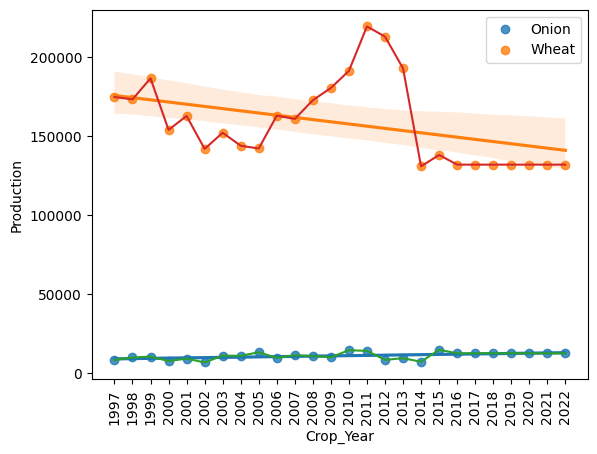

In [59]:
# After Prediction
full = pd.concat([onion_data, wheat_data, wheat_n_onion_df]) # Entire data collection
onion_full = full[full['Crop'] == 'Onion'] # Find the data rows containing 'Onion' in 'Crop' column
wheat_full = full[full['Crop'] == 'Wheat'] # Find the data rows containing 'Wheat' in 'Crop' column
onion_prod_full = onion_full.groupby("Crop_Year").mean(numeric_only=True)['Production'] # Mean Onion Production per year
wheat_prod_full = wheat_full.groupby("Crop_Year").mean(numeric_only=True)['Production'] # Mean Wheat Production per year

years_onion_prod_full = onion_prod_full.index # 'Years' index for Onion
years_onion_prod_full = pd.Series(years_onion_prod_full) # Make the 'Years' into a 1D date series label
years_wheat_prod_full = wheat_prod_full.index # 'Years' index for Wheat
years_wheat_prod_full = pd.Series(years_wheat_prod_full) # Make the 'Years' into a 1D date series label

onion_prod_df_full = pd.DataFrame(data=onion_prod_full,index=years_onion_prod_full) # Onion Production Dataframe (Years, Production)
wheat_prod_df_full = pd.DataFrame(data=wheat_prod_full,index=years_wheat_prod_full) # Wheat Production Dataframe (Years, Production)

sns.regplot(data=onion_prod_df_full,x=onion_prod_df_full.index,y=onion_prod_df_full.Production, label='Onion'); # Blue Color Onion Regression + Scatter Plot
sns.regplot(data=wheat_prod_df_full,x=wheat_prod_df_full.index,y=wheat_prod_df_full.Production, label='Wheat'); # Orange Color Wheat Regression + Scatter Plot

sns.lineplot(data=onion_prod_df_full,x=onion_prod_df_full.index,y=onion_prod_df_full.Production); # Blue Color Onion Line Plot
sns.lineplot(data=wheat_prod_df_full,x=wheat_prod_df_full.index,y=wheat_prod_df_full.Production); # Orange Color Wheat Line Plot

plt.gca().set_xticks(onion_prod_df_full.index); # Use original 'Years' from the onion production dataframe
# plt.gca().set_xticks(wheat_prod_df.index); # Use original data 'Years' from the wheat production dataframe

plt.xticks(rotation=90); # Rotate the X label by 90 degrees

In [60]:
only_wheat = wheat_n_onion_df[wheat_n_onion_df['Crop'] == 'Wheat'] # Only wheat data from the combined dataframe
only_onion = wheat_n_onion_df[wheat_n_onion_df['Crop'] == 'Onion'] # Only onion data from the combined dataframe
only_wheat_state_wise = only_wheat.groupby(['State_Name','Crop_Year']).mean(numeric_only=True)['Production'] # State-wise mean of Wheat Production
only_onion_state_wise = only_onion.groupby(['State_Name','Crop_Year']).mean(numeric_only=True)['Production'] # State-wise mean of Onion Production

In [61]:
################################## For Onion ##################################
onion_state_production_yearwise = {}
# Double Index, State Name + Year, in only onion state wise
#0th index selected (State Name), add that state name in dictionary and assigining it as an empty array/null array
#1st loop

for i in only_onion_state_wise.index:
    onion_state_production_yearwise[i[0]] = [] # Put the name of the states in the dictionary
    

# If condition is checking if the state name is in dictionary
# Adding years to the state in dictionary and then locating the production from only_onion_state_wise
# according to i[0] (which is State Name) and i[1] (which is Year)
for i in only_onion_state_wise.index:
    if i[0] in onion_state_production_yearwise:
        onion_state_production_yearwise[i[0]].append({i[1] : only_onion_state_wise.loc[(i[0], i[1])]})

Andhra Pradesh
Mean :  20225.666535132466
Median :  17725.968481810523
Variance :  75278434.01948862
Standard Deviation :  8676.314541295089
Average Deviation / Mean Absolute Deviation :  5415.8143696518855



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Assam
Mean :  2463.5977270441012
Median :  788.7826086956522
Variance :  6513474.703769944
Standard Deviation :  2552.1509954879125
Average Deviation / Mean Absolute Deviation :  2348.9044212682975

Bihar
Mean :  5503.598929075077
Median :  4434.189189189189
Variance :  4860227.317104332
Standard Deviation :  2204.592324468252
Average Deviation / Mean Absolute Deviation :  1991.3821054957618



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Chandigarh
Mean :  524.3593709050883
Median :  225.0
Variance :  262471.6991544926
Standard Deviation :  512.31991875633
Average Deviation / Mean Absolute Deviation :  469.77826873963323

Chhattisgarh
Mean :  1989.73368452617
Median :  1865.304347826087
Variance :  403335.9416498014
Standard Deviation :  635.0873496219251
Average Deviation / Mean Absolute Deviation :  517.0862827714836



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Gujarat
Mean :  58600.91745596455
Median :  54302.63662918982
Variance :  572783177.7209913
Standard Deviation :  23932.88903832948
Average Deviation / Mean Absolute Deviation :  17632.643327208887

Haryana
Mean :  3576.780150316593
Median :  3164.285714285714
Variance :  2198964.60416392
Standard Deviation :  1482.8906244777193
Average Deviation / Mean Absolute Deviation :  1137.8060105373086

Himachal Pradesh
Mean :  479.5008500096844
Median :  404.5
Variance :  637635.4461027738
Standard Deviation :  798.5207862684439


C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Average Deviation / Mean Absolute Deviation :  544.4481294221983

Jammu and Kashmir 
Mean :  1222.2412866620527
Median :  162.0
Variance :  1423725.8690260996
Standard Deviation :  1193.199844546629
Average Deviation / Mean Absolute Deviation :  1179.318411834517



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Jharkhand
Mean :  3504.4981207848436
Median :  4729.212442064978
Variance :  2983178.5876685916
Standard Deviation :  1727.1880579915412
Average Deviation / Mean Absolute Deviation :  1580.9260481804538

Karnataka
Mean :  19335.113065874924
Median :  20761.84460752605
Variance :  54064595.36796747
Standard Deviation :  7352.86307284227


C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Average Deviation / Mean Absolute Deviation :  5941.286070731675

Madhya Pradesh
Mean :  15846.006841872684
Median :  18045.0
Variance :  40090578.32257955
Standard Deviation :  6331.712116211503
Average Deviation / Mean Absolute Deviation :  5243.833090293675

Maharashtra
Mean :  52435.79359630673
Median :  50353.180935907636
Variance :  19186482.80948563
Standard Deviation :  4380.237757186889
Average Deviation / Mean Absolute Deviation :  3239.6196939541414

Manipur
Mean :  1553.5358174480614
Median :  396.6666666666667
Variance :  2339599.7461885945
Standard Deviation :  1529.5750214319644


C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Average Deviation / Mean Absolute Deviation :  1498.4025678799032

Odisha
Mean :  9297.334593195073
Median :  10262.895976351652
Variance :  2569982.1000539954
Standard Deviation :  1603.1163713386484
Average Deviation / Mean Absolute Deviation :  1391.4183460334714

Puducherry
Mean :  115.72853976916007
Median :  73.686235047301
Variance :  32356.903525026235
Standard Deviation :  179.88024773450317
Average Deviation / Mean Absolute Deviation :  114.2443539577195



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Rajasthan
Mean :  11710.99523568013
Median :  12717.65572858732
Variance :  21249410.039078236
Standard Deviation :  4609.708237955872
Average Deviation / Mean Absolute Deviation :  4091.868694131004

Tamil Nadu
Mean :  12274.104145258856
Median :  12915.12012987013
Variance :  6794397.9277747655
Standard Deviation :  2606.6065924444306
Average Deviation / Mean Absolute Deviation :  2001.473964988991



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


Telangana 
Mean :  19321.15200465685
Median :  16142.485738006102
Variance :  35909213.56506318
Standard Deviation :  5992.429687953225
Average Deviation / Mean Absolute Deviation :  4401.765554811106

Uttar Pradesh
Mean :  3591.889276797036
Median :  3548.921428571429
Variance :  2045137.9665778114
Standard Deviation :  1430.0832026766175
Average Deviation / Mean Absolute Deviation :  1266.4745919632758



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.p

Uttarakhand
Mean :  2183.677160182593
Median :  1361.076923076923
Variance :  7998313.750207485
Standard Deviation :  2828.129019370843
Average Deviation / Mean Absolute Deviation :  1389.38735665484



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\3640766633.py:30: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())


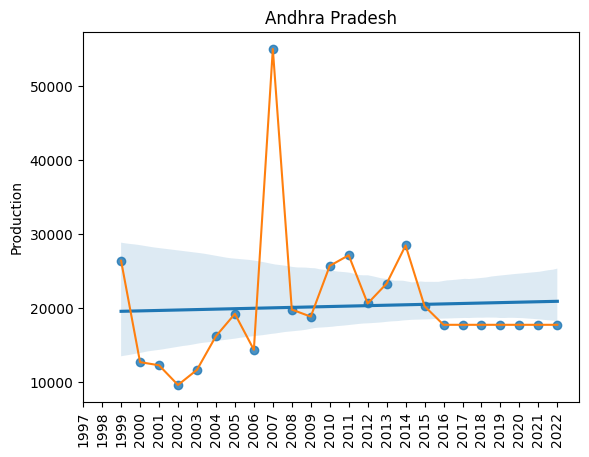

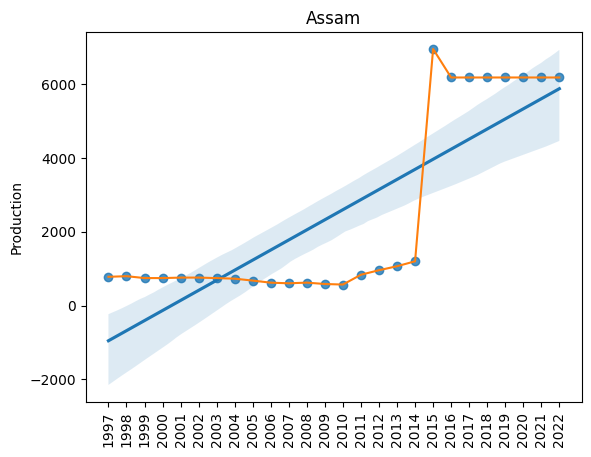

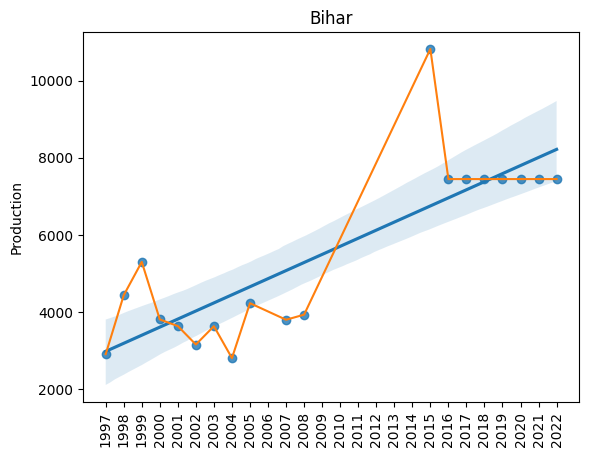

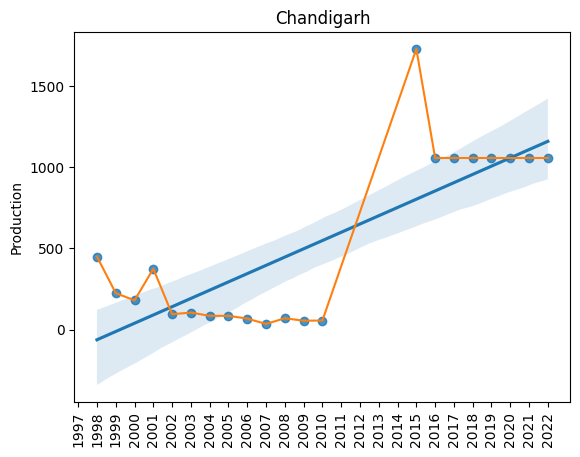

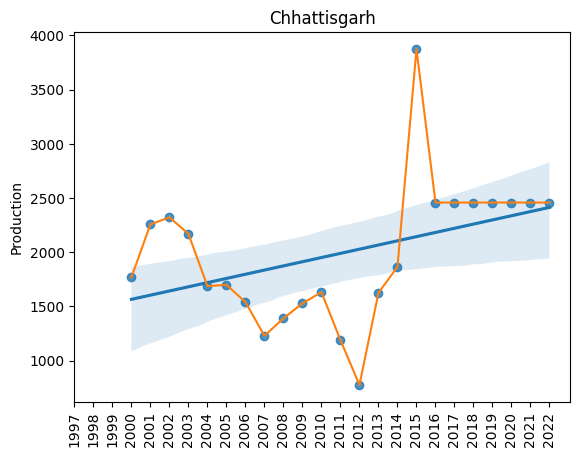

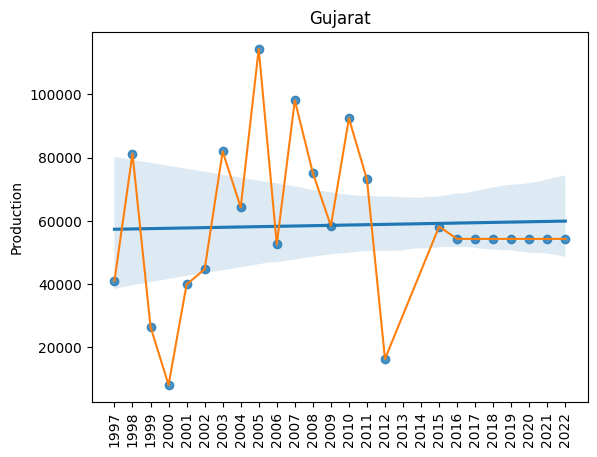

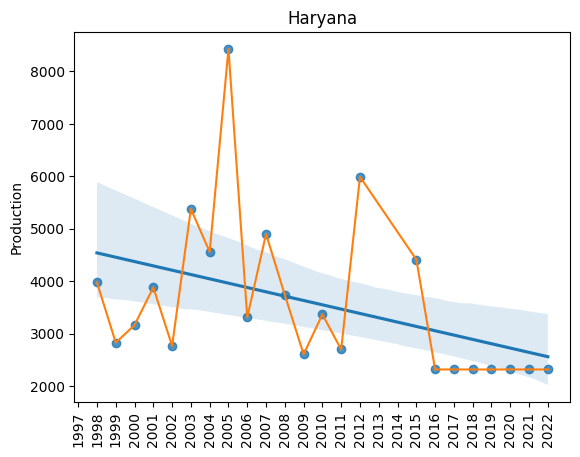

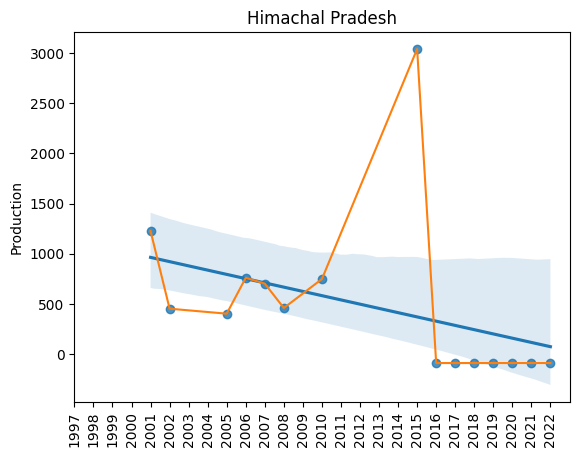

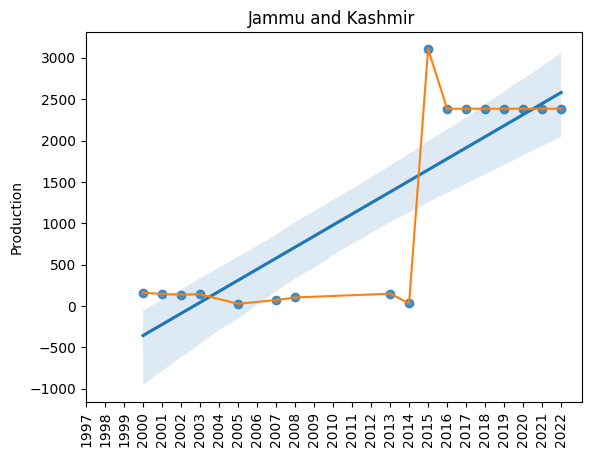

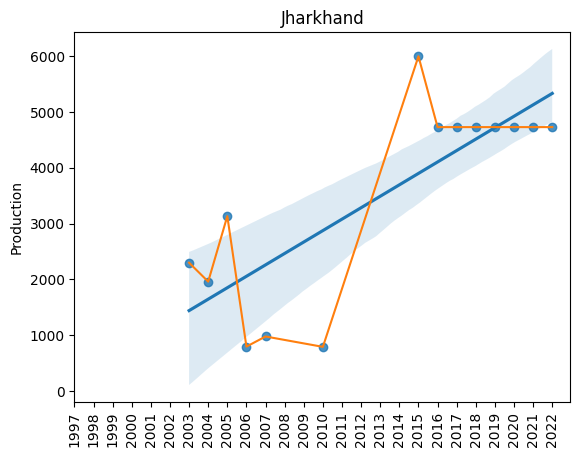

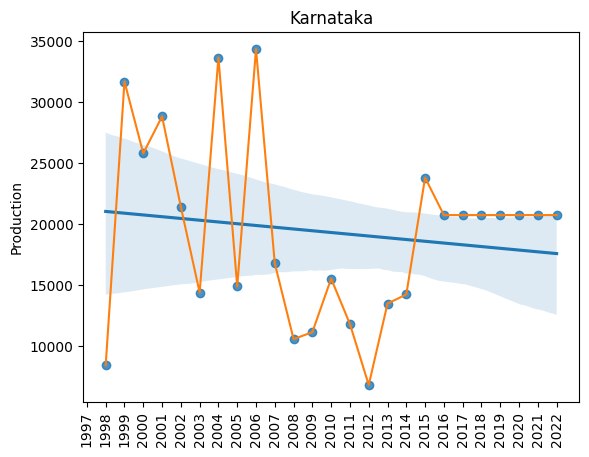

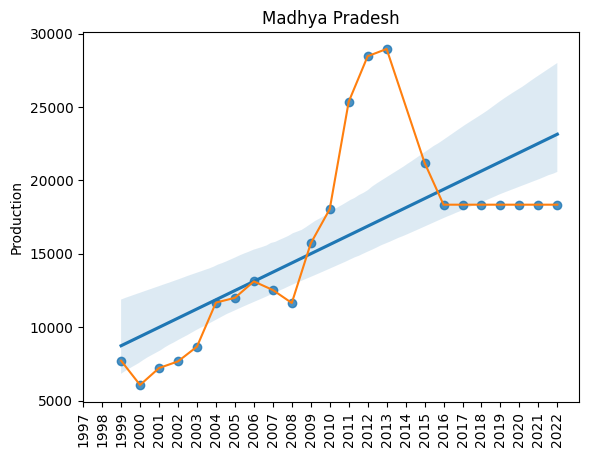

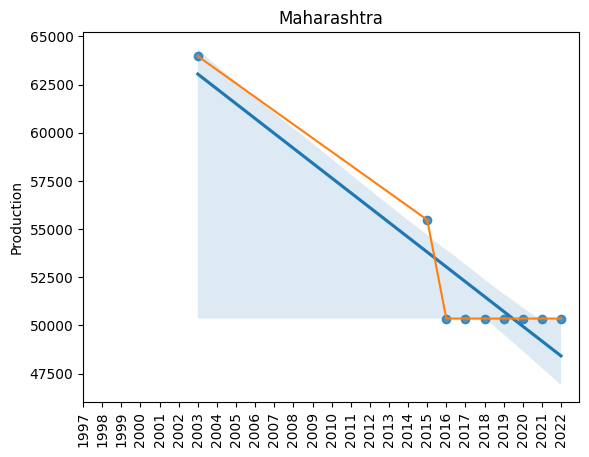

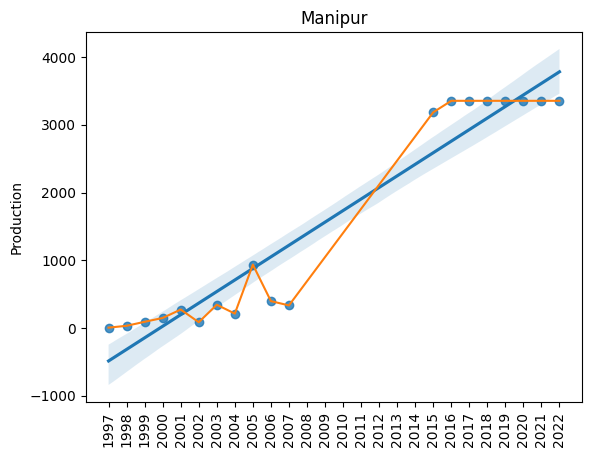

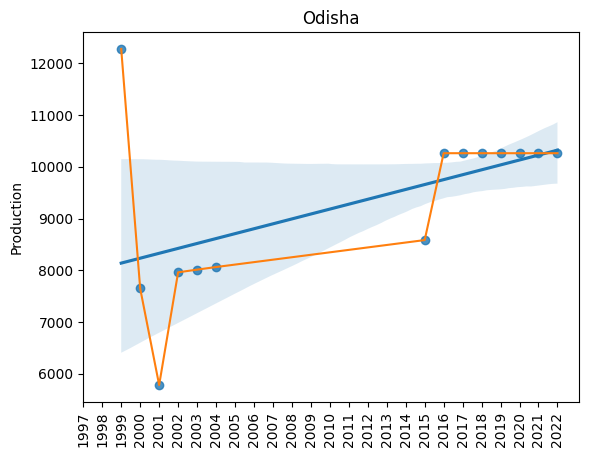

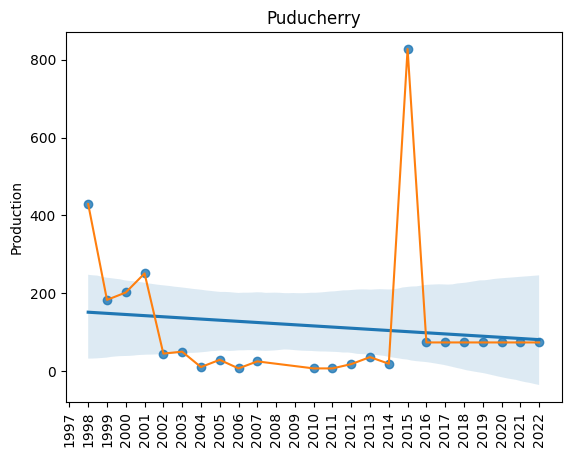

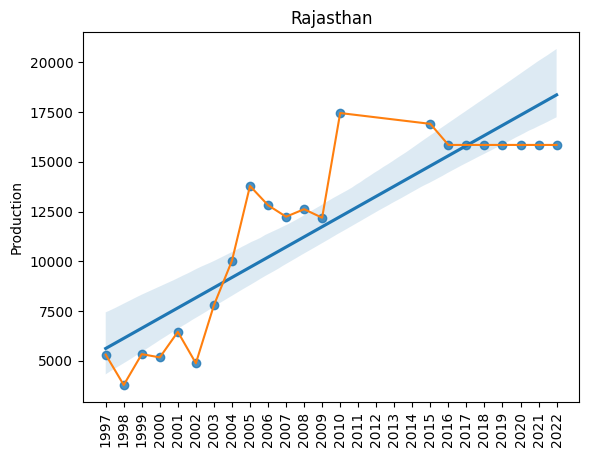

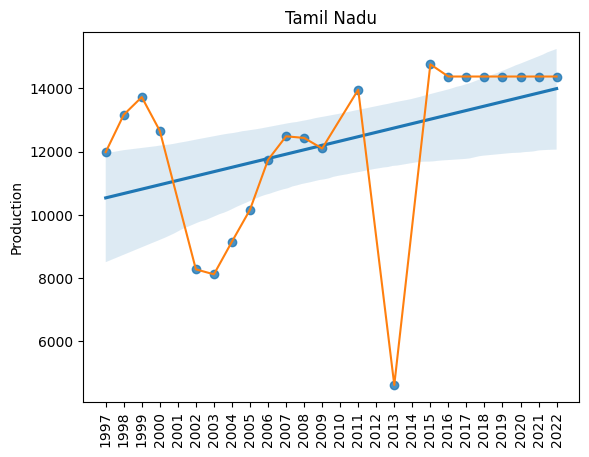

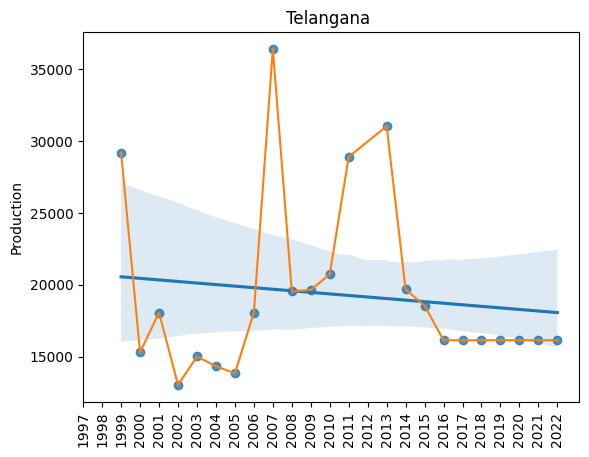

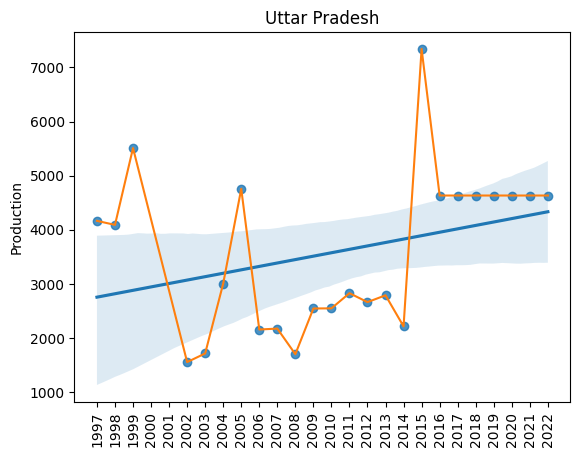

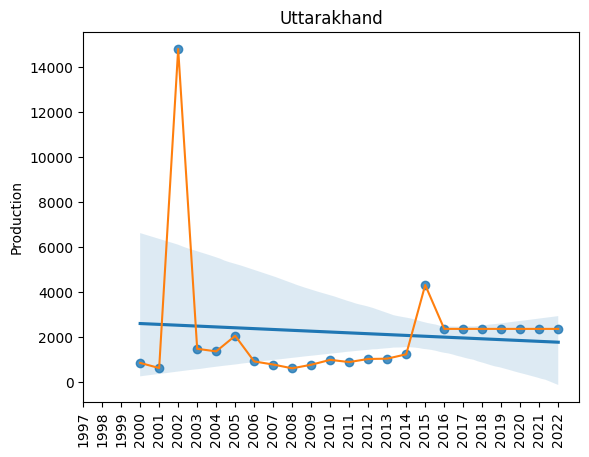

In [62]:
# Iterating over state names in dictionary 
# Second for loop, going to state and iterating over each year
# Third for loop, appending production to data variable and the year to the year_keys variable which will be used for
# plotting
# Always intialized as empty again on a new iteration
# Plotting is also done in the loop
for i in onion_state_production_yearwise:
    data = []
    year_keys = []
    for year in onion_state_production_yearwise[i]:
        
        for y in year.keys():
            data.append(year[y])
            year_keys.append(y)
            
    onion_statewise_plot = pd.DataFrame(data=data,index=year_keys)
    plt.figure()
    temp = sns.regplot(data=onion_statewise_plot,x=onion_statewise_plot.index,y=onion_statewise_plot[0])
    sns.lineplot(data=onion_statewise_plot,x=onion_statewise_plot.index,y=onion_statewise_plot[0])
    plt.gca().set_xticks(onion_prod_df_full.index);
    plt.xticks(rotation=90);
    plt.title(i)
    temp.set_ylabel('Production')
    
    print(i)
    print("Mean : ", onion_statewise_plot[0].mean(numeric_only=True))
    print("Median : ", onion_statewise_plot[0].median())
    print("Variance : ", onion_statewise_plot[0].var(ddof=0)) 
    print("Standard Deviation : ", onion_statewise_plot[0].std(ddof=0))
    print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
    print("")


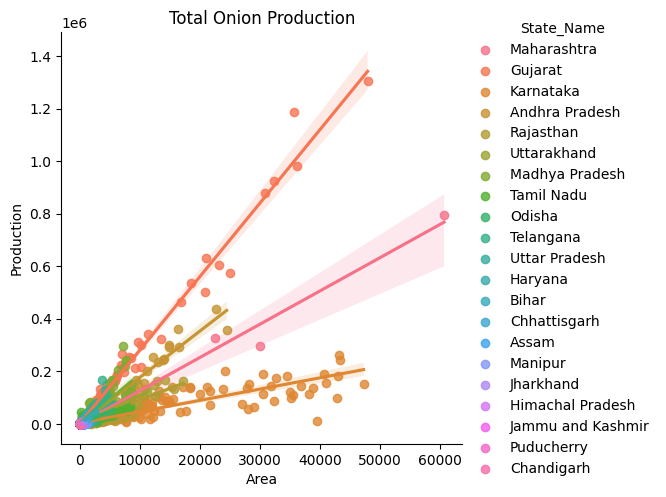

In [63]:
sns.lmplot(data=onion_data, x='Area', y='Production', hue='State_Name'); # Reg+FacetGrid = lmplot, plotting all over India onion production x area
plt.title("Total Onion Production");

C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\2032861461.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


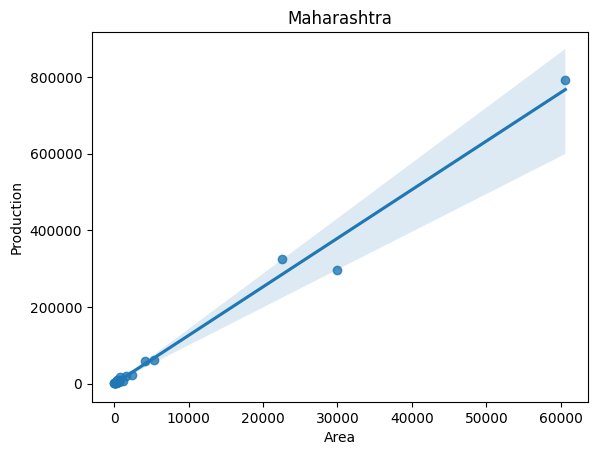

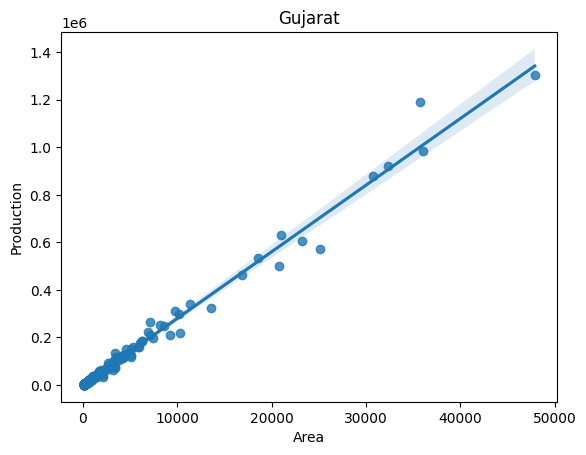

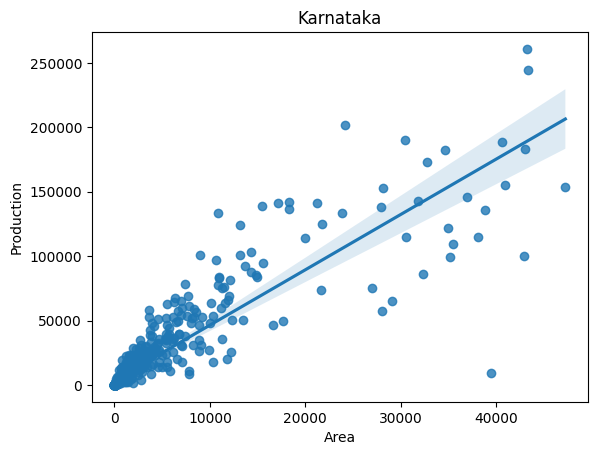

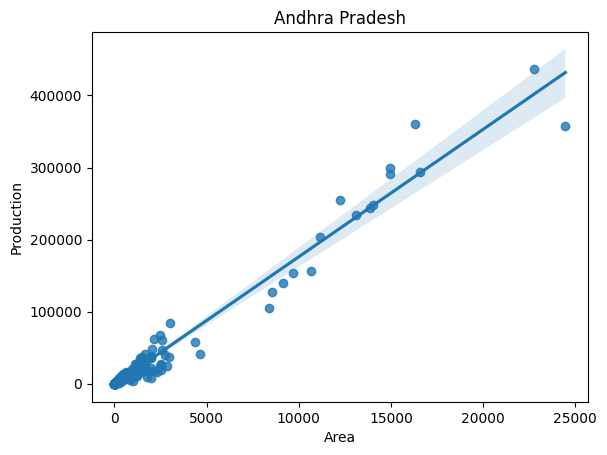

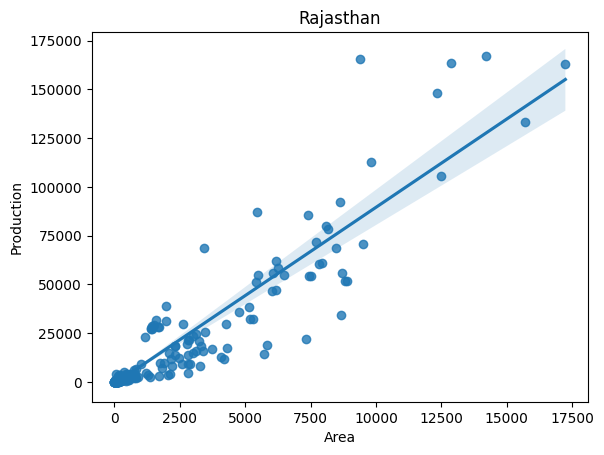

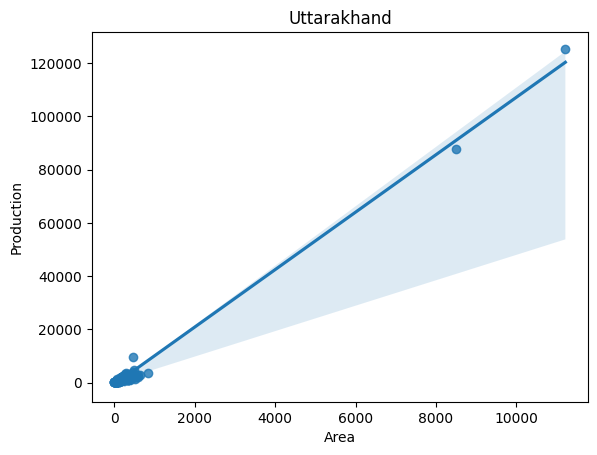

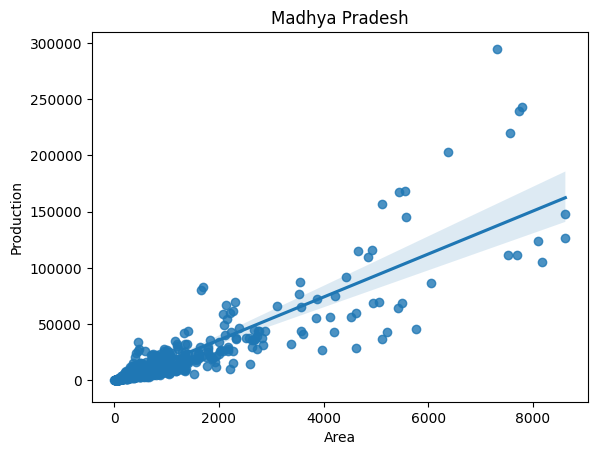

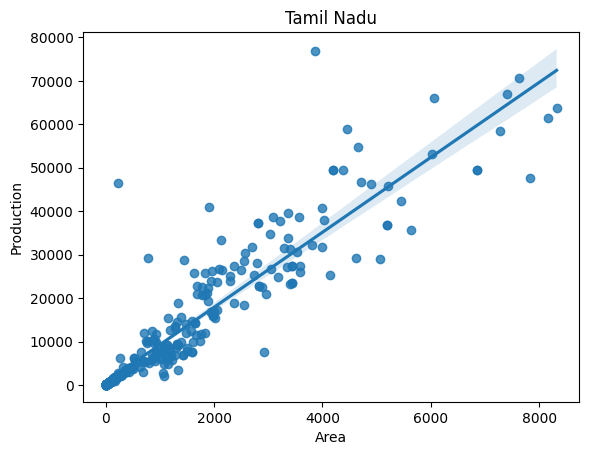

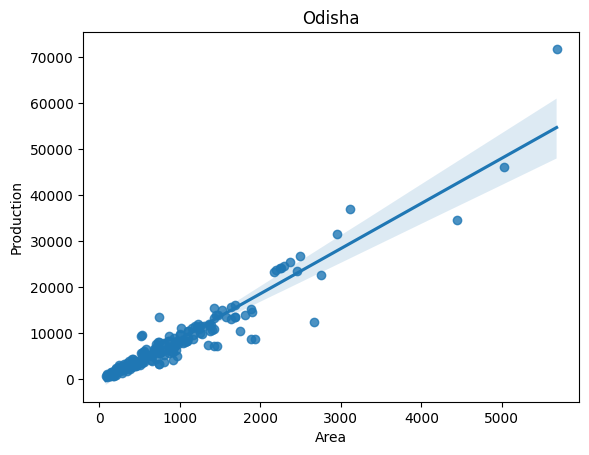

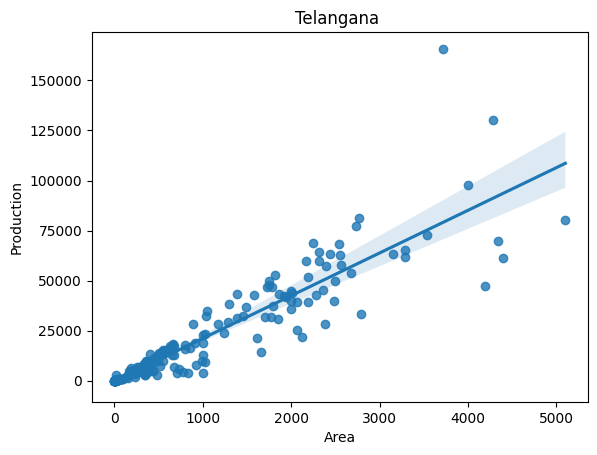

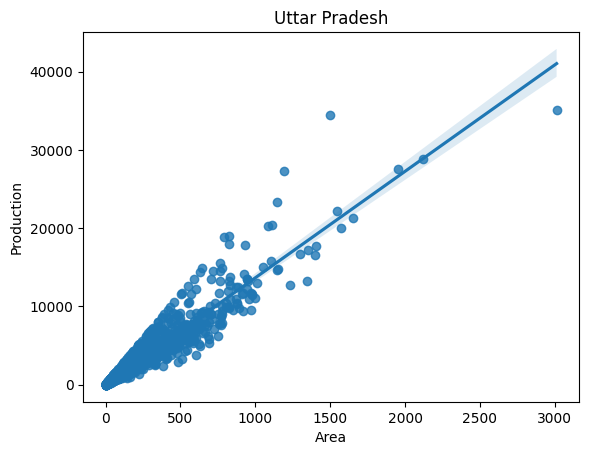

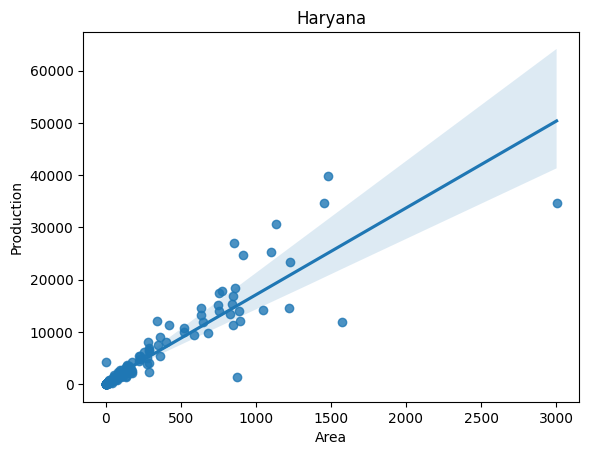

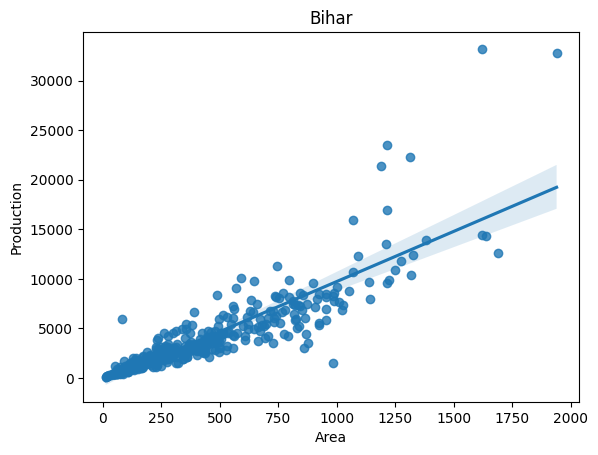

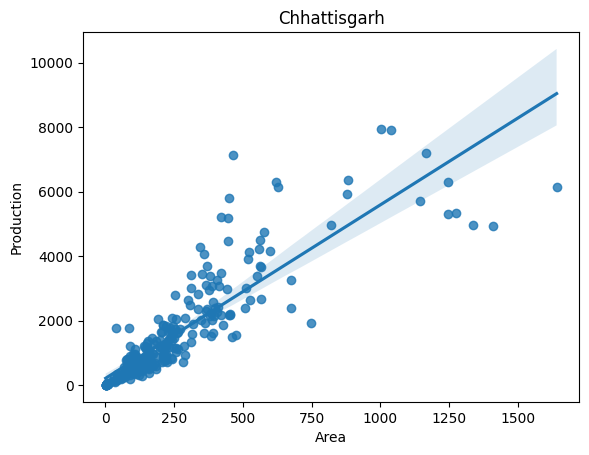

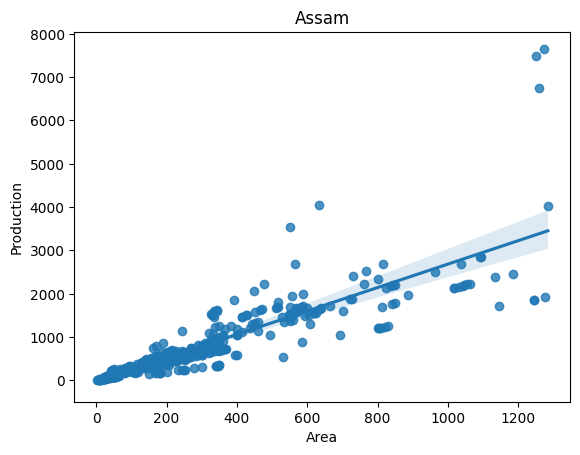

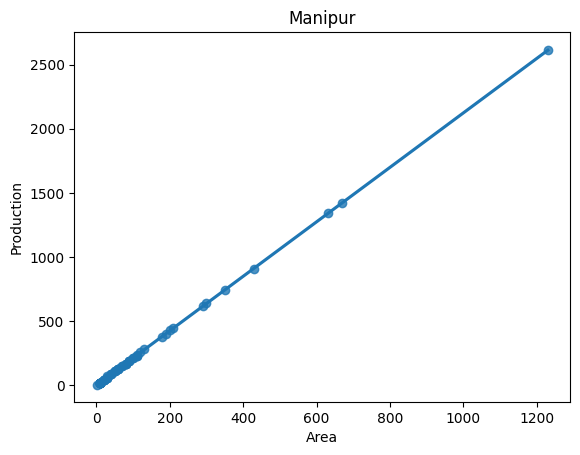

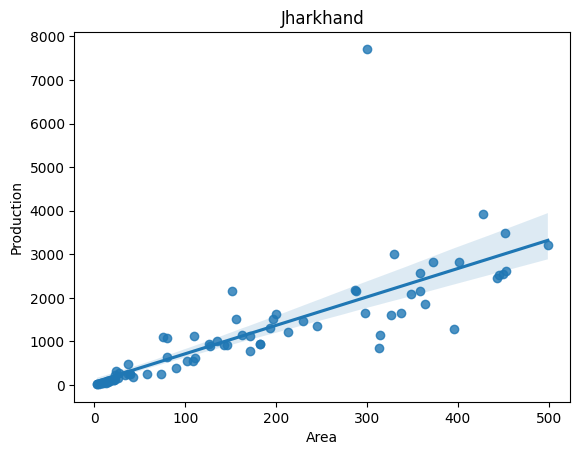

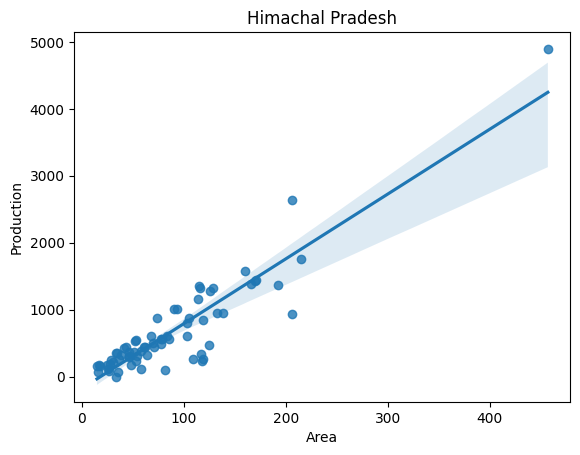

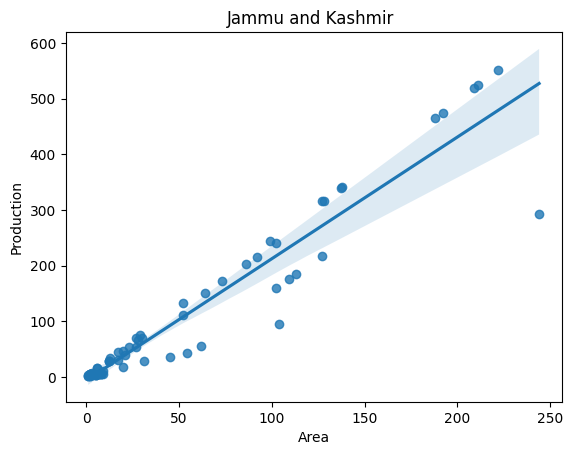

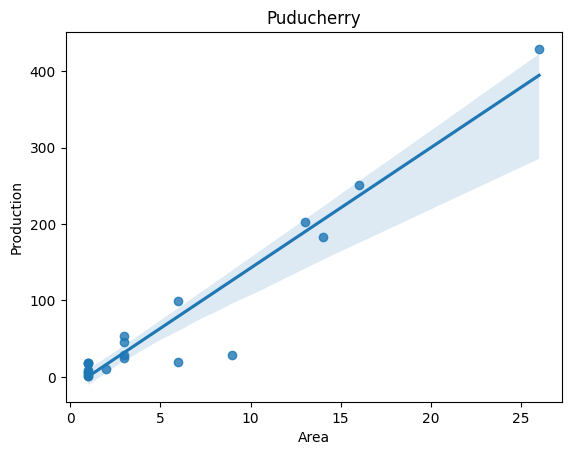

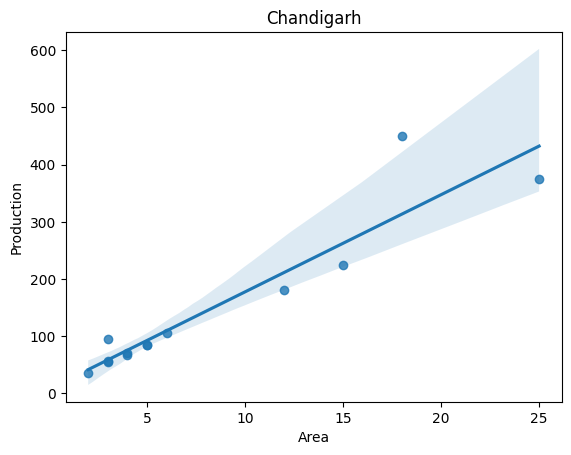

In [64]:
for state in onion_data.State_Name.unique(): # Function for plotting Area x Production state-wise for Onion
    data=onion_data[onion_data.State_Name == state]
    plt.figure()
    plt.title(state)
    sns.regplot(data=data, x='Area', y='Production', label='Onion');

In [65]:
################################## For Wheat ##################################

wheat_state_production_yearwise = {}
# Double Index, State Name + Year, in only onion state wise
#0th index selected (State Name), add that state name in dictionary and assigining it as an empty array/null array
#1st loop

for i in only_wheat_state_wise.index:
    wheat_state_production_yearwise[i[0]] = [] # Put the name of the states in the dictionary
    

# If condition is checking if the state name is in dictionary
# Adding years to the state in dictionary and then locating the production from only_onion_state_wise
# according to i[0] (which is State Name) and i[1] (which is Year)
for i in only_wheat_state_wise.index:
    if i[0] in wheat_state_production_yearwise:
        wheat_state_production_yearwise[i[0]].append({i[1] : only_wheat_state_wise.loc[(i[0], i[1])]})

Andhra Pradesh
Mean :  532.0649069135615
Median :  250.0
Variance :  520604.59839427576
Standard Deviation :  721.5293468697415
Average Deviation / Mean Absolute Deviation :  471.51627340244346

Arunachal Pradesh
Mean :  1113.9627022457867
Median :  515.2628205128206
Variance :  926799.7038466989
Standard Deviation :  962.7043699115003
Average Deviation / Mean Absolute Deviation :  836.0607291988462



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Assam
Mean :  4266.869396644174
Median :  3625.98418972332
Variance :  5326846.642915381
Standard Deviation :  2307.9962397966297
Average Deviation / Mean Absolute Deviation :  2044.3657455292846

Bihar
Mean :  113135.47768624568
Median :  110061.81228614564
Variance :  540780806.8641096
Standard Deviation :  23254.6942973695
Average Deviation / Mean Absolute Deviation :  17675.663262092392

Chandigarh
Mean :  2418.0174186587924


C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Median :  2700.0
Variance :  743902.4038596225
Standard Deviation :  862.4977703505224
Average Deviation / Mean Absolute Deviation :  766.5515215328091

Chhattisgarh
Mean :  5788.649501860786
Median :  5630.24
Variance :  462467.7567921556
Standard Deviation :  680.0498193457267
Average Deviation / Mean Absolute Deviation :  552.883723501964



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Dadra and Nagar Haveli
Mean :  1528.0160539145893
Median :  1470.0
Variance :  838696.8550018475
Standard Deviation :  915.8039391713968
Average Deviation / Mean Absolute Deviation :  709.1405490106746

Gujarat
Mean :  91425.58588055434
Median :  82027.66450984438
Variance :  1270531117.4481971
Standard Deviation :  35644.510340979534
Average Deviation / Mean Absolute Deviation :  24382.29285172792



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Haryana
Mean :  466138.0833332908
Median :  477815.7894736842
Variance :  3882404799.591047
Standard Deviation :  62308.9463848575
Average Deviation / Mean Absolute Deviation :  54437.38758358831

Himachal Pradesh
Mean :  40793.226409940144
Median :  38641.59192953879
Variance :  67631096.86725181
Standard Deviation :  8223.812793786821
Average Deviation / Mean Absolute Deviation :  6434.470349579853



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Jammu and Kashmir 
Mean :  24668.3703546184
Median :  23778.692118616018
Variance :  66318475.89001787
Standard Deviation :  8143.615652154629
Average Deviation / Mean Absolute Deviation :  5569.049955538387

Jharkhand
Mean :  4279.3335578117
Median :  4306.809500077702
Variance :  1912356.2832266954
Standard Deviation :  1382.879706708684
Average Deviation / Mean Absolute Deviation :  899.4290789451738



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Karnataka
Mean :  14876.448166612312
Median :  15222.920579911724
Variance :  8568540.361206345
Standard Deviation :  2927.2069214878447
Average Deviation / Mean Absolute Deviation :  2185.6522931822205

Kerala
Mean :  219.48548006302573
Median :  429.1906305364828
Variance :  213425.3612571641
Standard Deviation :  461.9798277600052
Average Deviation / Mean Absolute Deviation :  326.2080118475999



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Madhya Pradesh
Mean :  163728.8379265384
Median :  142715.6423563678
Variance :  3512173089.5463924
Standard Deviation :  59263.58991443559
Average Deviation / Mean Absolute Deviation :  43127.82041473471

Maharashtra
Mean :  41355.57320229298
Median :  37199.20158094602
Variance :  187321657.29483017
Standard Deviation :  13686.550233525984
Average Deviation / Mean Absolute Deviation :  9963.505460023984



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Meghalaya
Mean :  1211.6504362962428
Median :  1277.1866358208931
Variance :  1189343.0446849673
Standard Deviation :  1090.5700549185124
Average Deviation / Mean Absolute Deviation :  865.9164188443928

Mizoram
Mean :  255.7817937534288
Median :  475.02367116952666
Variance :  75611.90090892704
Standard Deviation :  274.9761824393652
Average Deviation / Mean Absolute Deviation :  255.78219031878083



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Nagaland
Mean :  1095.6471759364897
Median :  1040.8659333660114
Variance :  635198.074913275
Standard Deviation :  796.9931460892716
Average Deviation / Mean Absolute Deviation :  595.3538344094834

Odisha
Mean :  312.8292147606519
Median :  286.87777777777774
Variance :  41257.98365762918
Standard Deviation :  203.12061357141766
Average Deviation / Mean Absolute Deviation :  170.03346487753217



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.p

Punjab
Mean :  779796.673630112
Median :  777105.2631578947
Variance :  7377800985.05721
Standard Deviation :  85894.12660396058
Average Deviation / Mean Absolute Deviation :  75006.06186968225

Rajasthan
Mean :  193431.01770063528
Median :  180815.0625
Variance :  1374347841.0922701
Standard Deviation :  37072.19768360476
Average Deviation / Mean Absolute Deviation :  29329.081161601436

Sikkim
Mean :  1559.641219619776


C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Median :  1539.0086115818235
Variance :  668848.7444466072
Standard Deviation :  817.8317335776395
Average Deviation / Mean Absolute Deviation :  619.2579743912432

Tamil Nadu
Mean :  557.2527535797389
Median :  625.5206817839008
Variance :  346814.0032580075
Standard Deviation :  588.9091638427844
Average Deviation / Mean Absolute Deviation :  364.94628016427026

Telangana 
Mean :  2623.1097293401913
Median :  1726.0
Variance :  3780010.4246673984
Standard Deviation :  1944.2248904556793
Average Deviation / Mean Absolute Deviation :  1726.5168509502791



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Tripura
Mean :  543.2200534296754
Median :  525.0
Variance :  161055.8817764201
Standard Deviation :  401.31768186365787
Average Deviation / Mean Absolute Deviation :  248.55885556686246

Uttar Pradesh
Mean :  340358.5867898405
Median :  340450.5055900621
Variance :  3011095361.152669
Standard Deviation :  54873.44859905079
Average Deviation / Mean Absolute Deviation :  48052.14662359621



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


Uttarakhand
Mean :  56499.327162859125
Median :  55511.769230769234
Variance :  40208062.07988552
Standard Deviation :  6340.982737706003
Average Deviation / Mean Absolute Deviation :  5575.202153481499

West Bengal
Mean :  47156.26060127324
Median :  47006.91666666667
Variance :  20846830.350720488
Standard Deviation :  4565.832930662322
Average Deviation / Mean Absolute Deviation :  3939.638638377558



C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1940445120.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())


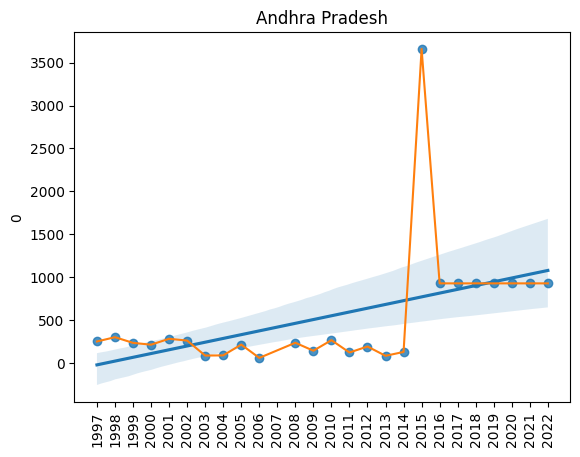

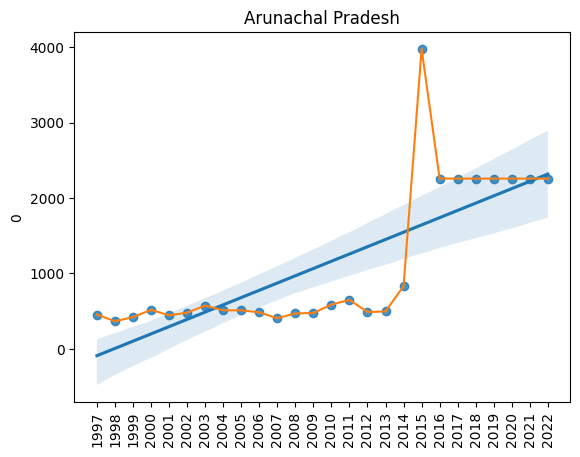

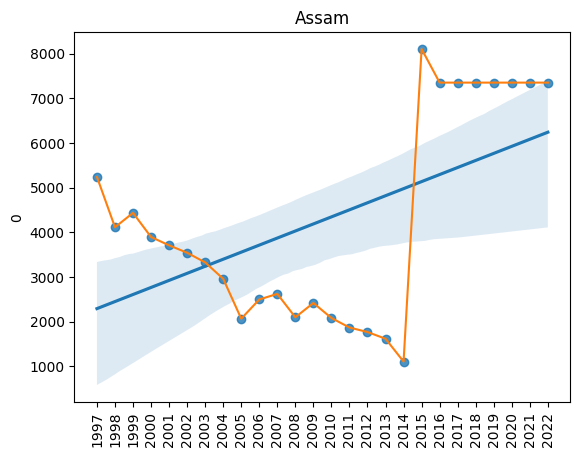

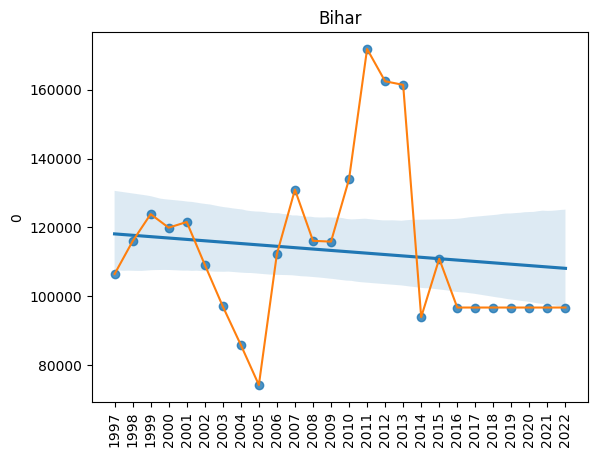

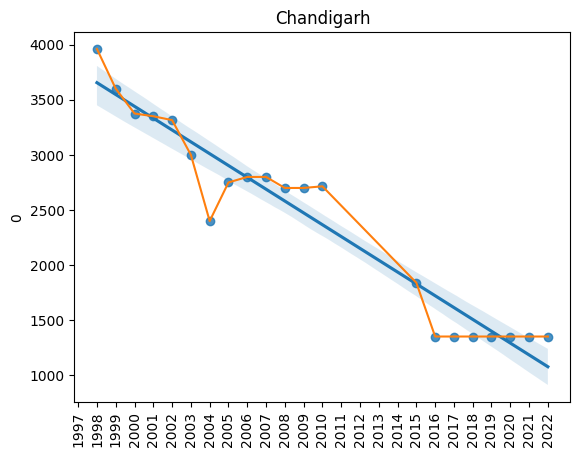

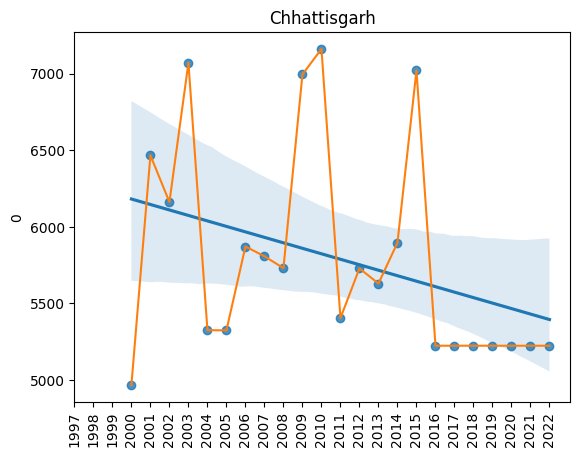

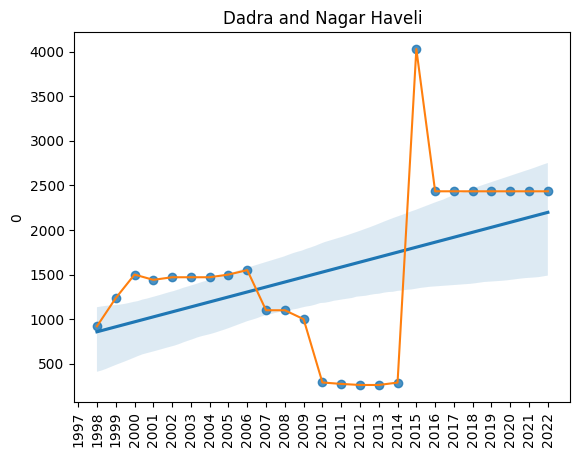

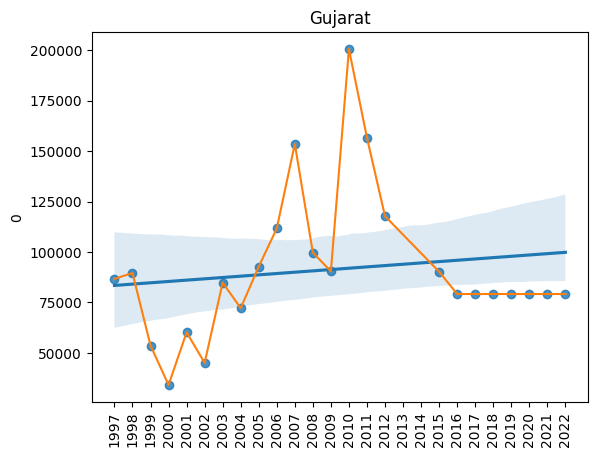

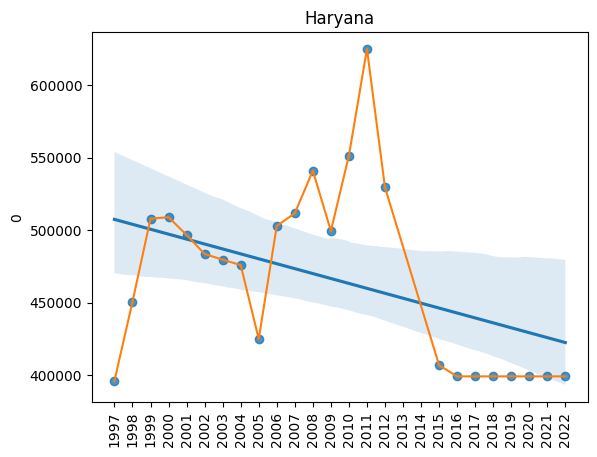

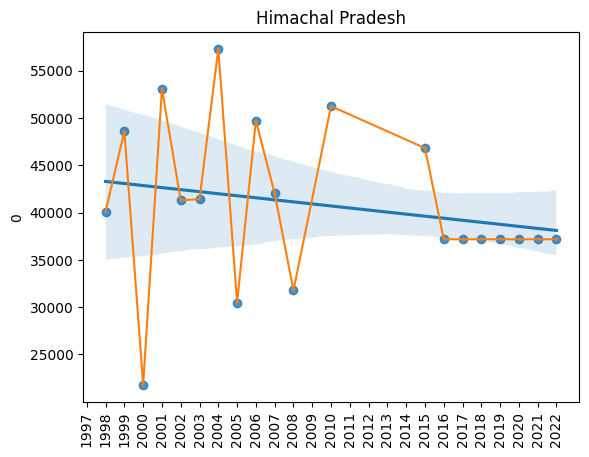

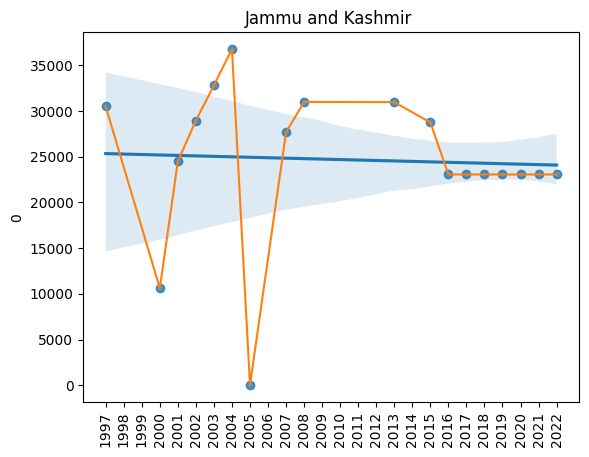

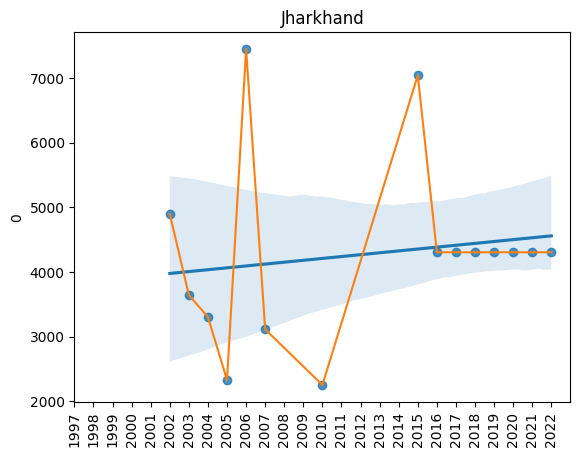

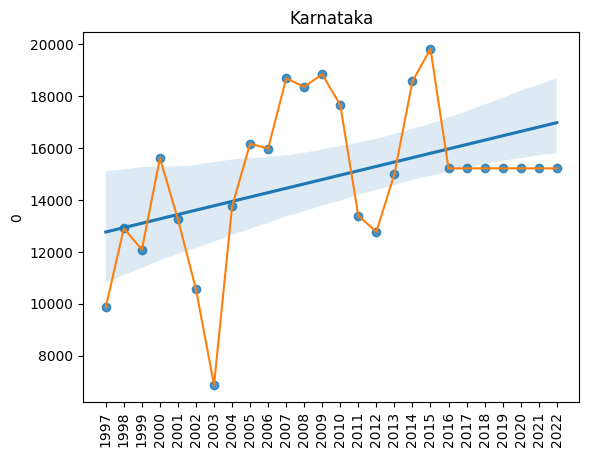

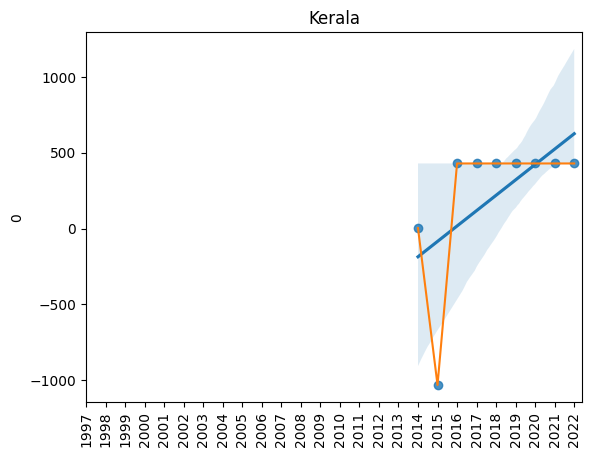

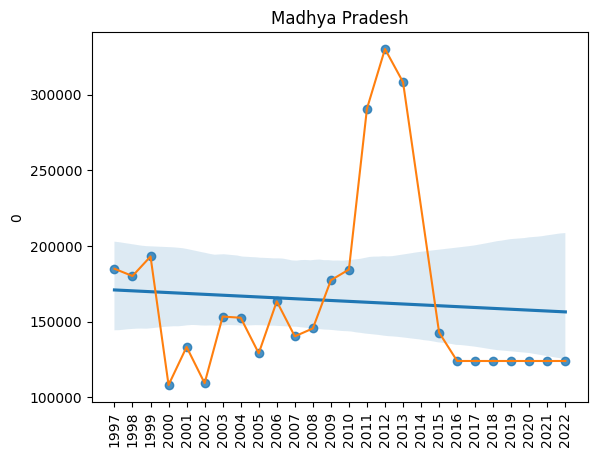

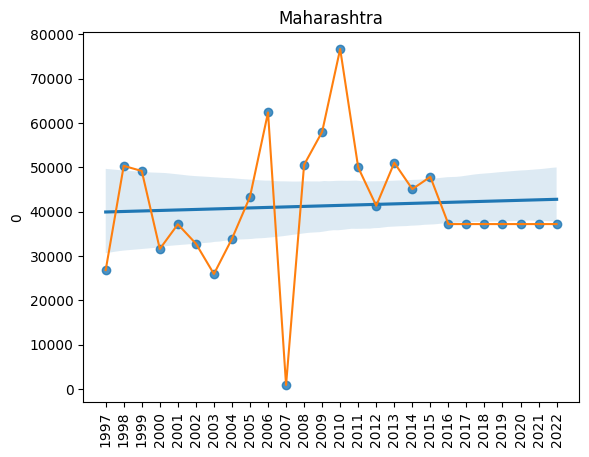

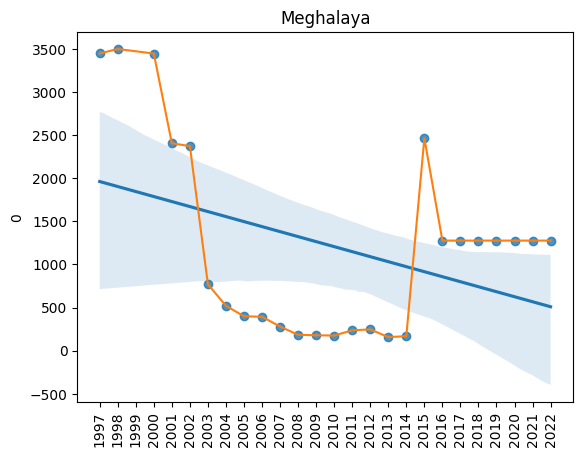

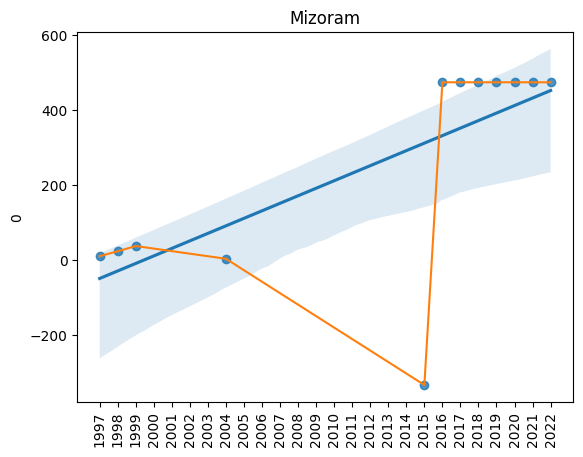

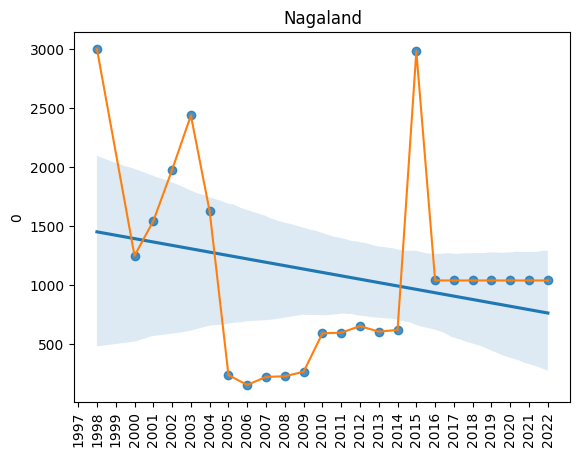

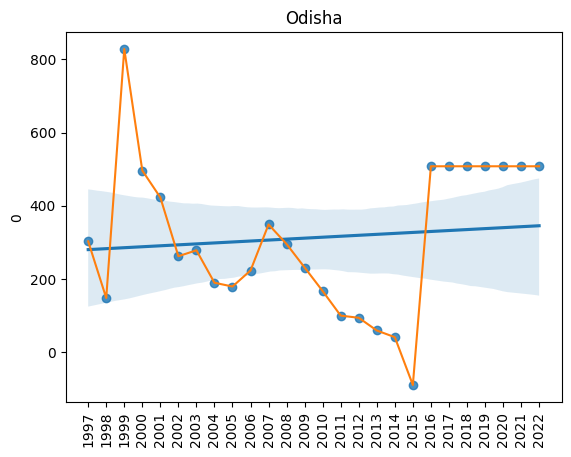

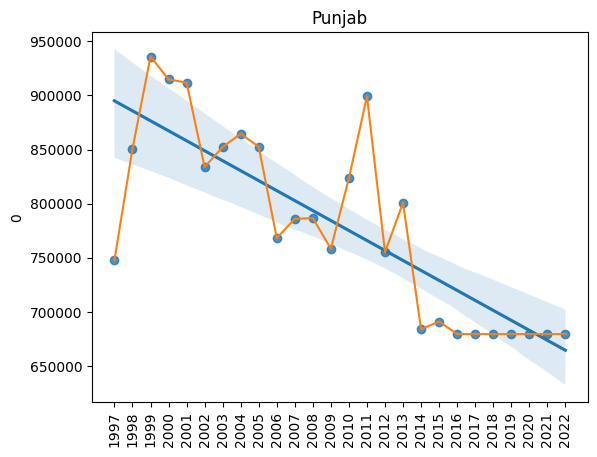

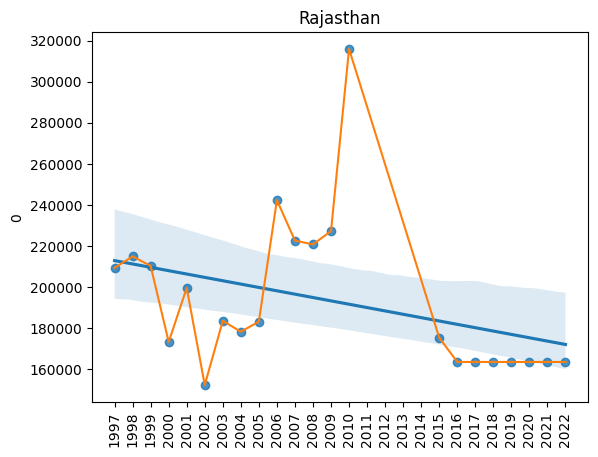

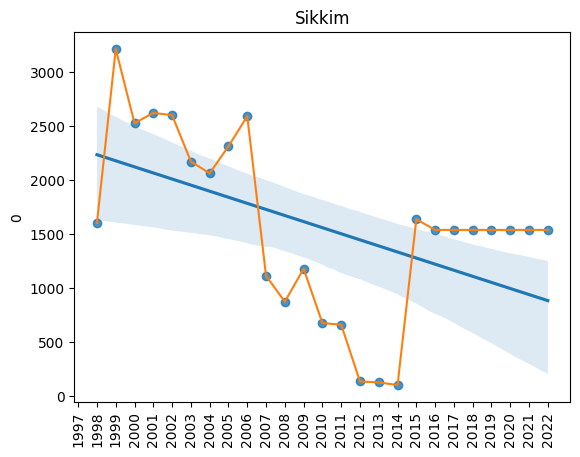

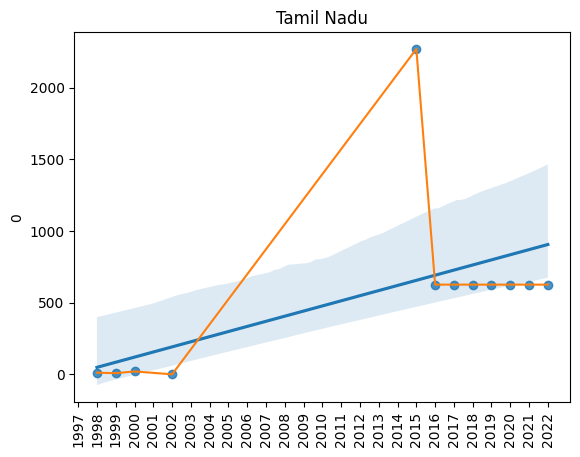

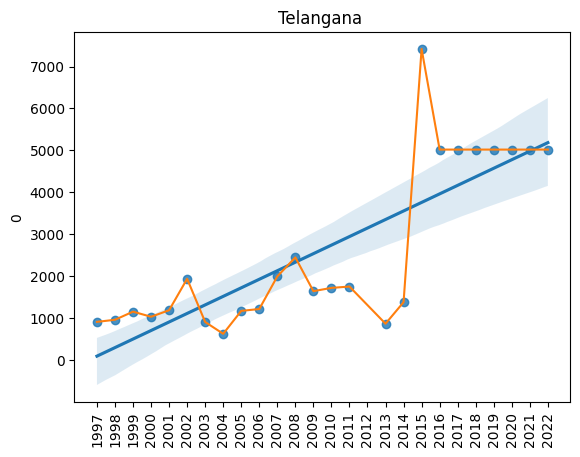

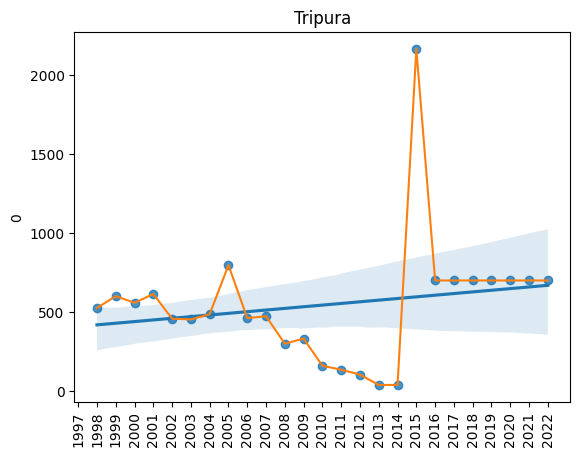

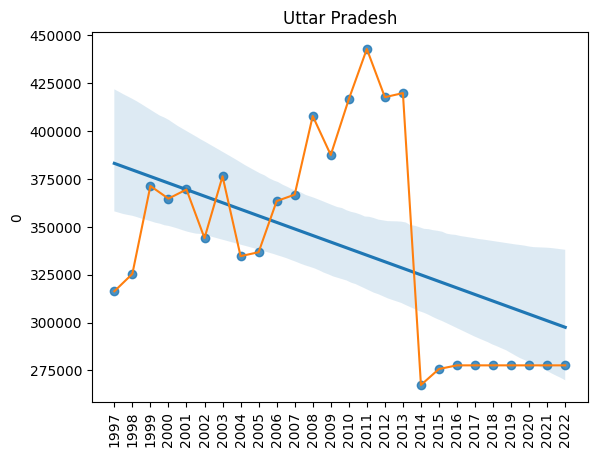

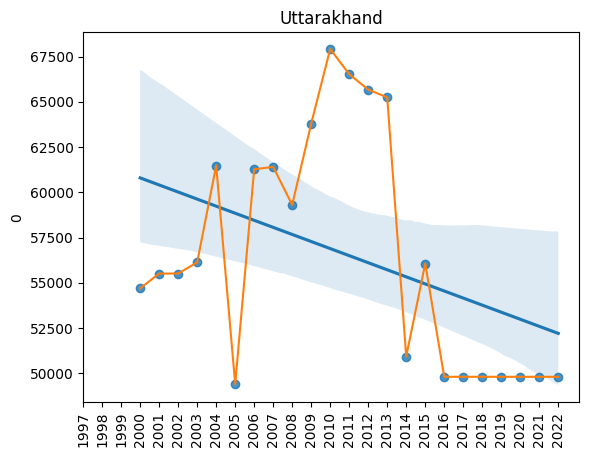

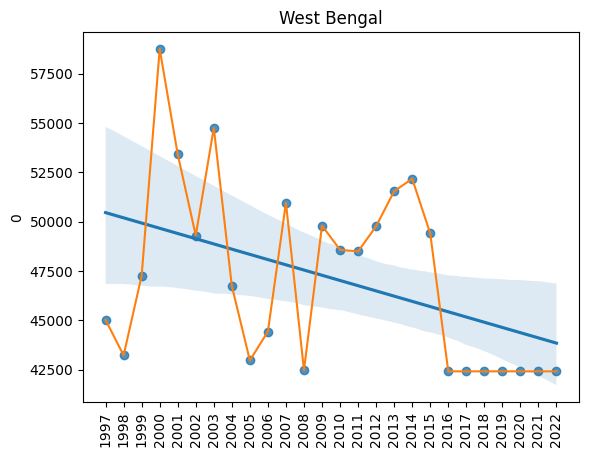

In [66]:
# Iterating over state names in dictionary 
# Second for loop, going to state and iterating over each year
# Third for loop, appending production to data variable and the year to the year_keys variable which will be used for
# plotting
# Always intialized as empty again on a new iteration
# Plotting is also done in the loop
for i in wheat_state_production_yearwise:
    data = []
    year_keys = []
    for year in wheat_state_production_yearwise[i]:
        
        for y in year.keys():
            data.append(year[y])
            year_keys.append(y)
            
    wheat_statewise_plot = pd.DataFrame(data=data,index=year_keys)
    plt.figure()
    sns.regplot(data=wheat_statewise_plot,x=wheat_statewise_plot.index,y=wheat_statewise_plot[0])
    sns.lineplot(data=wheat_statewise_plot,x=wheat_statewise_plot.index,y=wheat_statewise_plot[0])
    plt.gca().set_xticks(wheat_prod_df_full.index);
    plt.xticks(rotation=90);
    plt.title(i)
    
    print(i)
    print("Mean : ", wheat_statewise_plot[0].mean(numeric_only=True))
    print("Median : ", wheat_statewise_plot[0].median())
    print("Variance : ", wheat_statewise_plot[0].var(ddof=0)) 
    print("Standard Deviation : ", wheat_statewise_plot[0].std(ddof=0))
    print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
    print("")


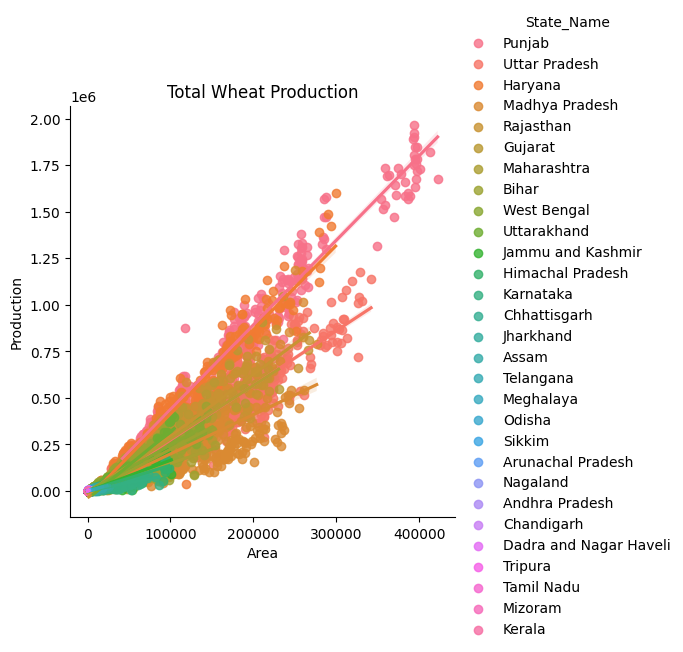

In [67]:
sns.lmplot(data=wheat_data, x='Area', y='Production', hue='State_Name'); # Reg+FacetGrid = lmplot, plotting all over India wheat production x area
plt.title("Total Wheat Production");

C:\Users\Melwin\AppData\Local\Temp\ipykernel_15248\1954298237.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


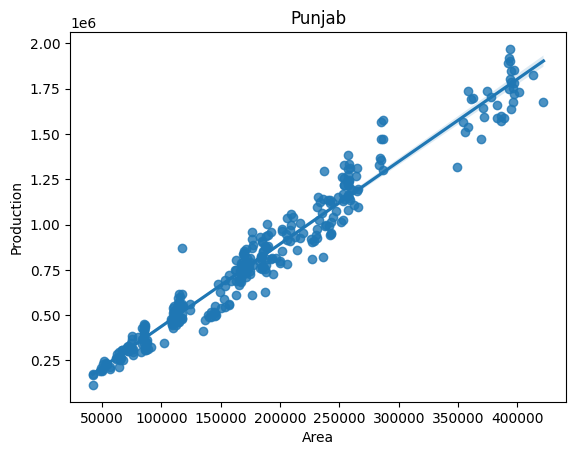

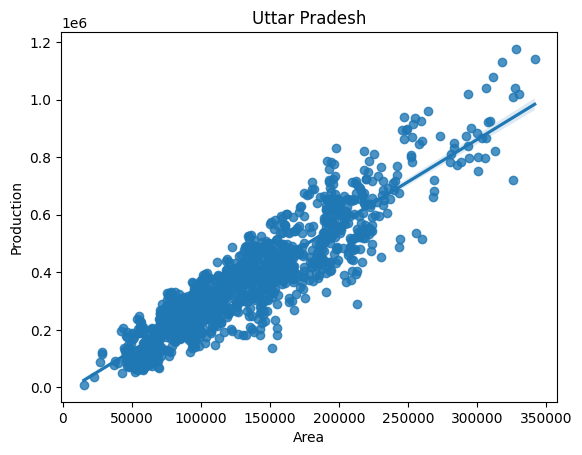

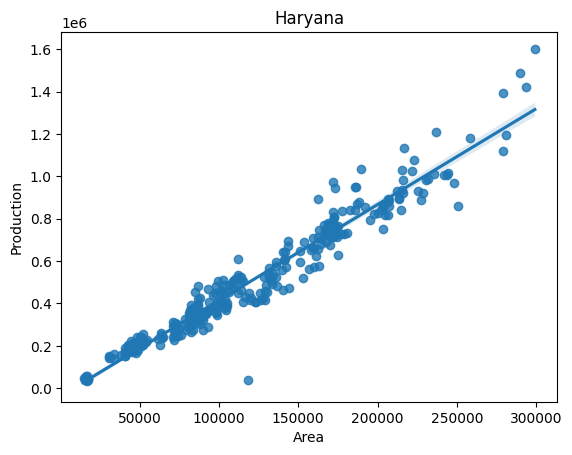

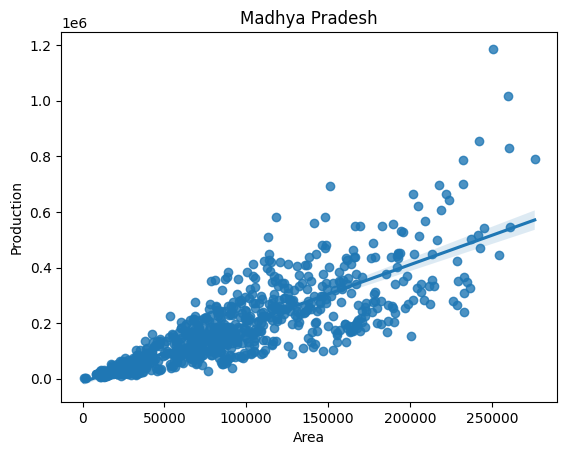

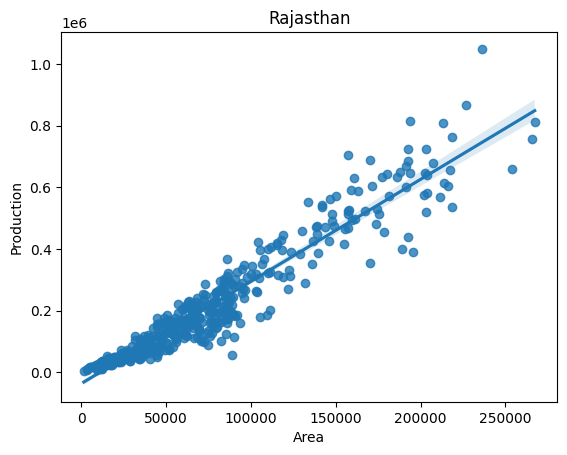

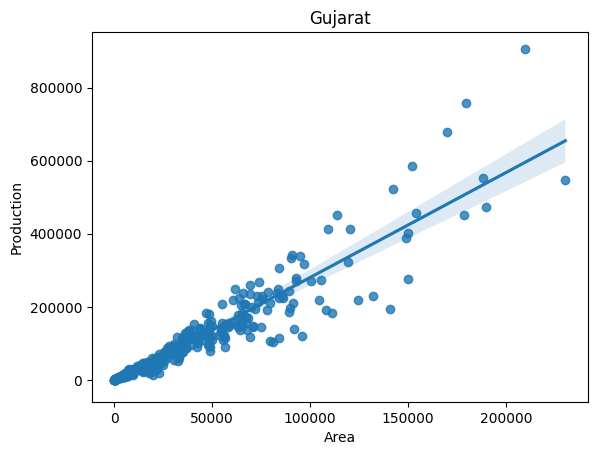

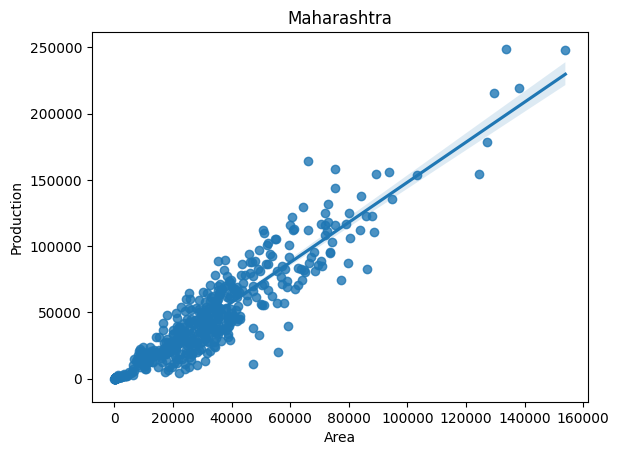

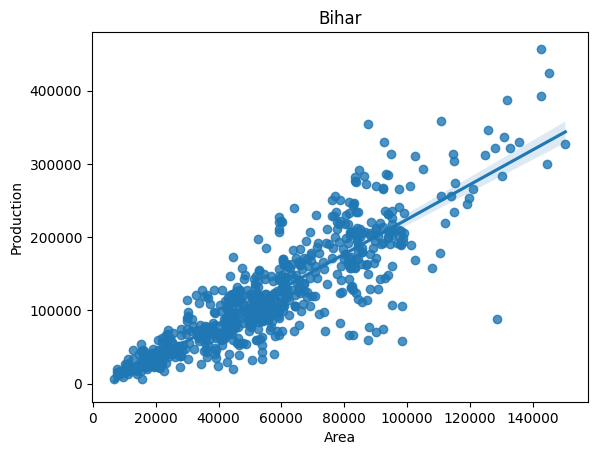

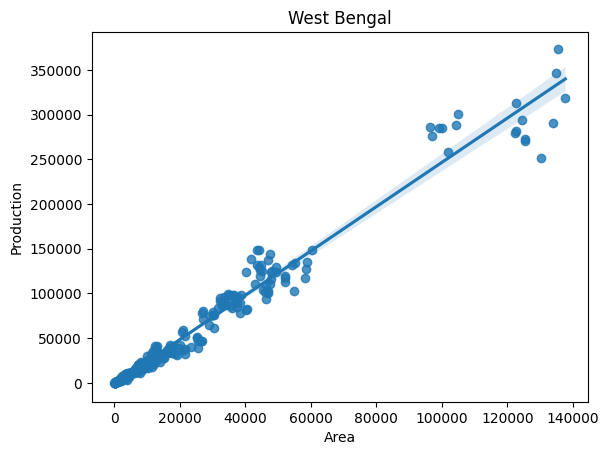

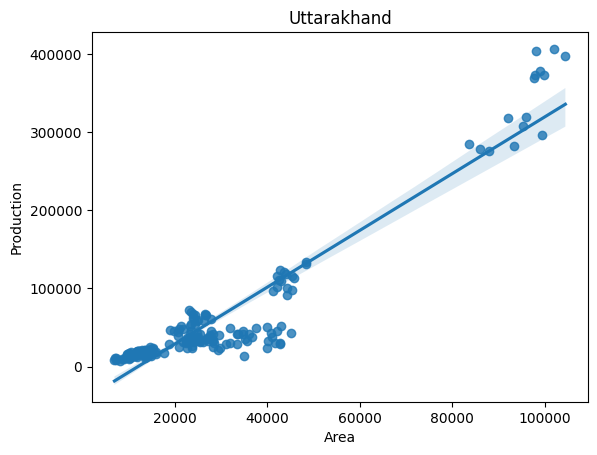

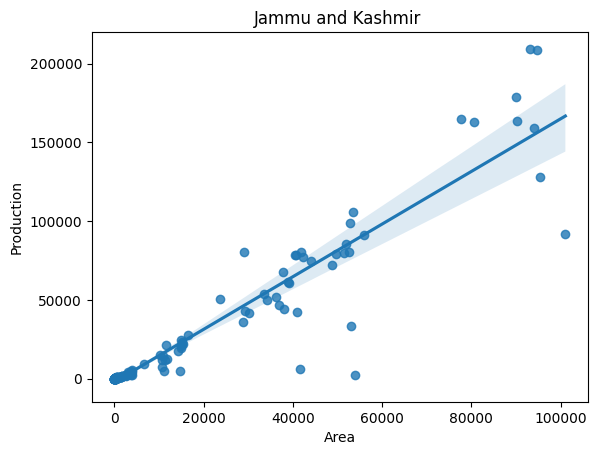

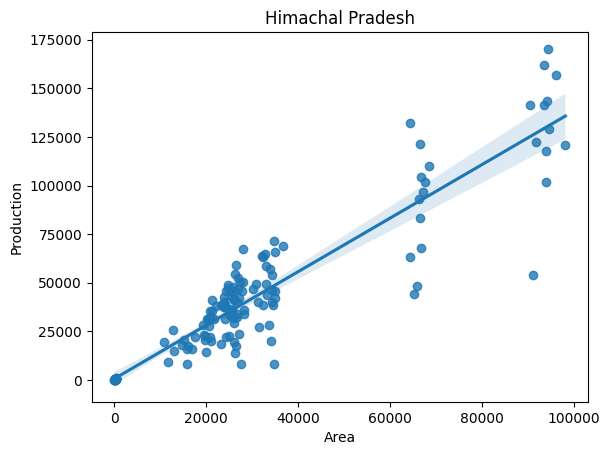

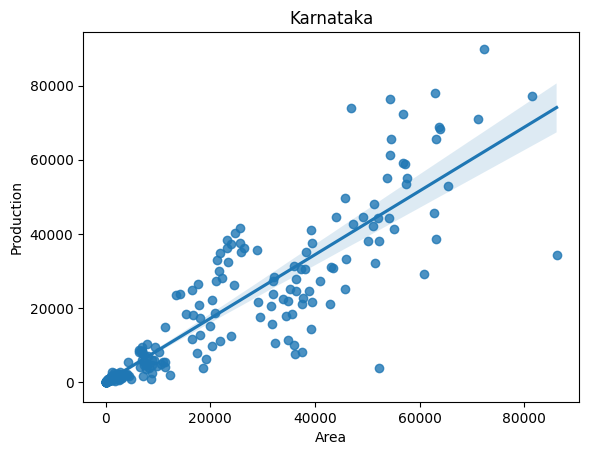

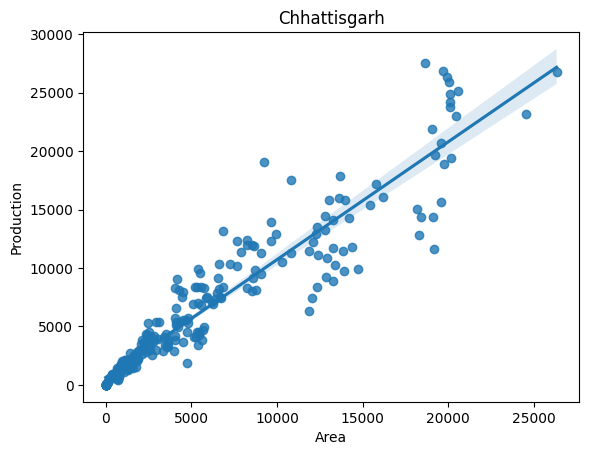

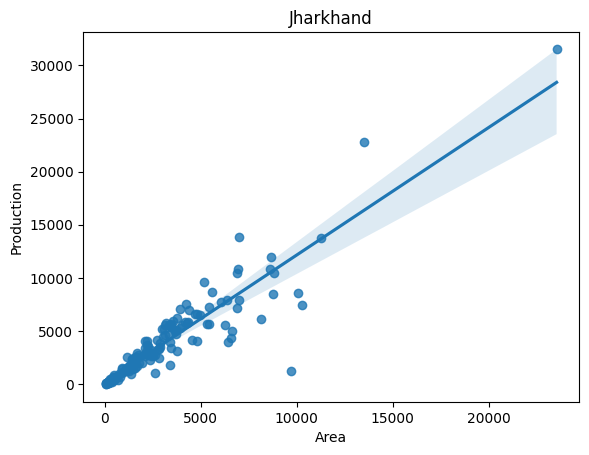

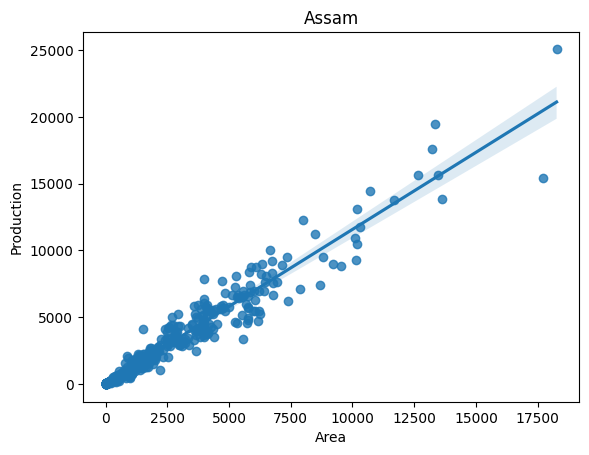

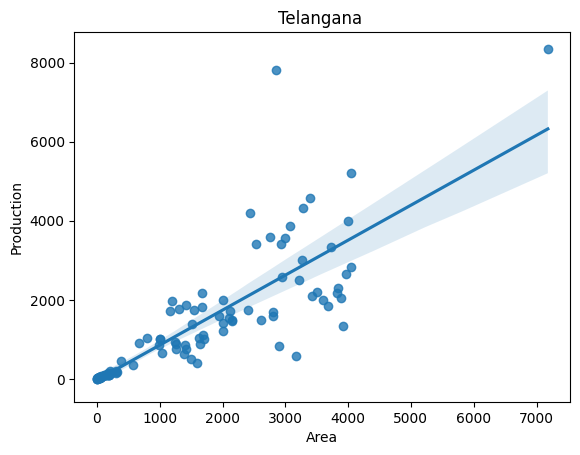

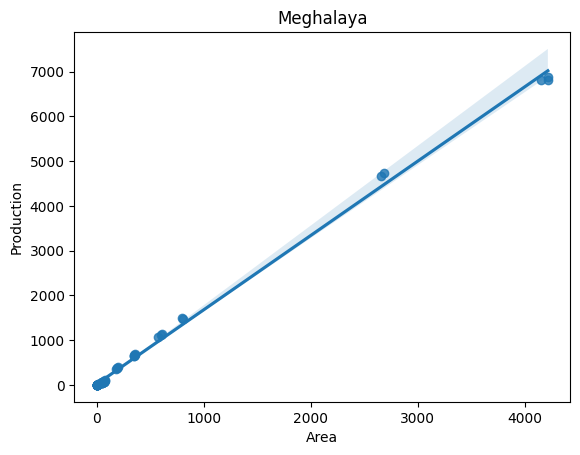

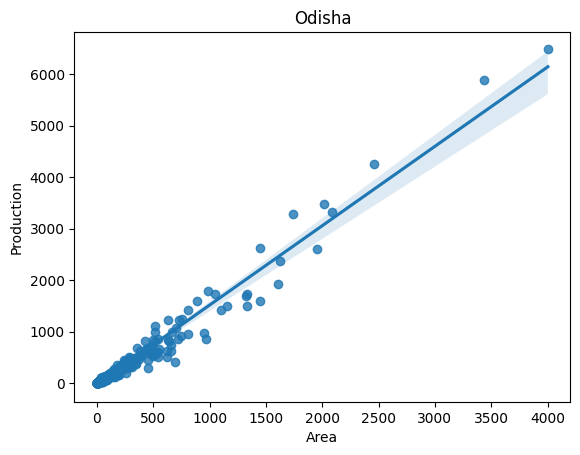

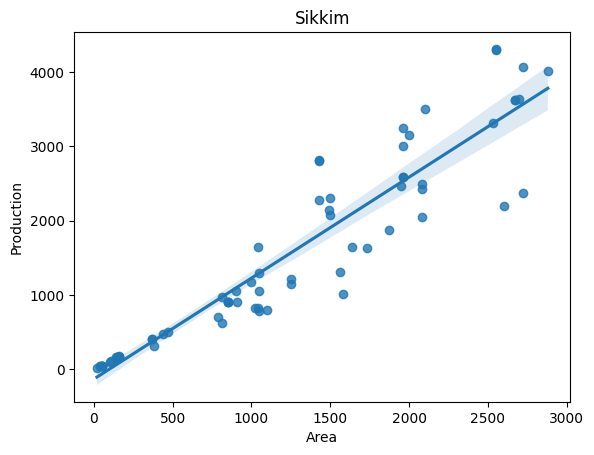

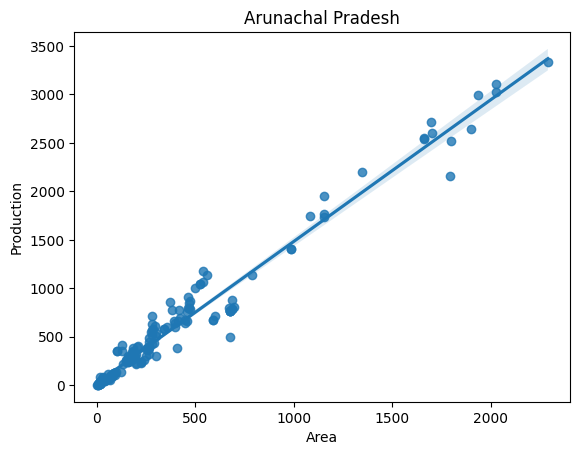

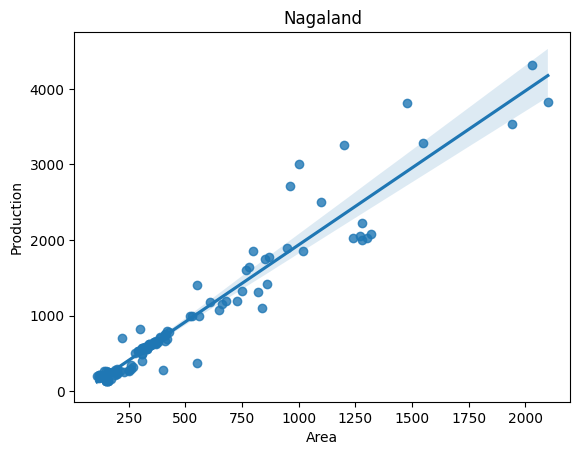

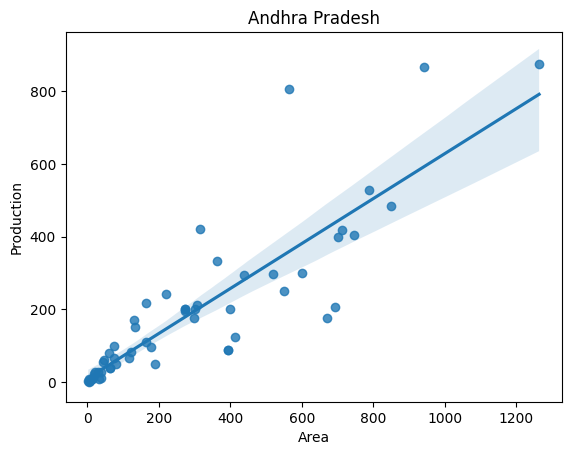

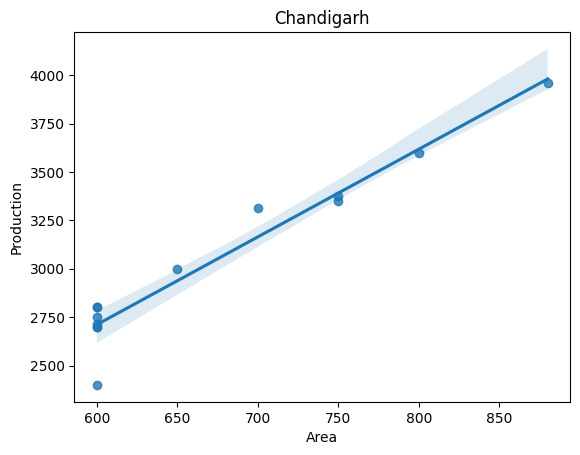

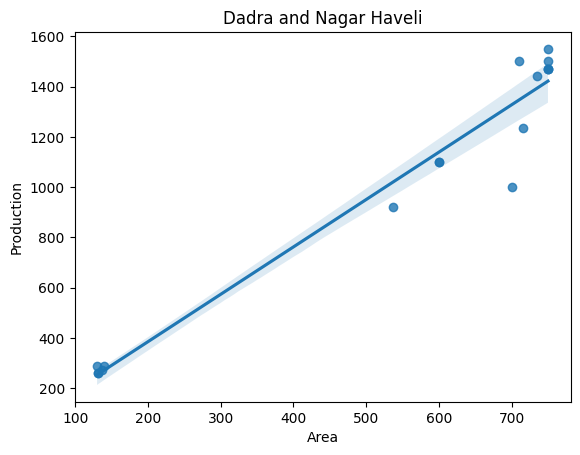

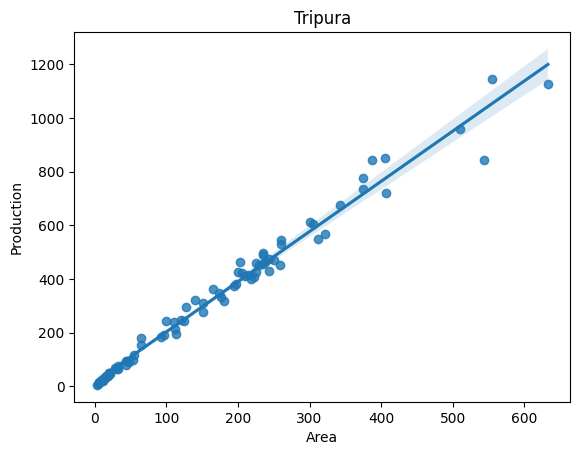

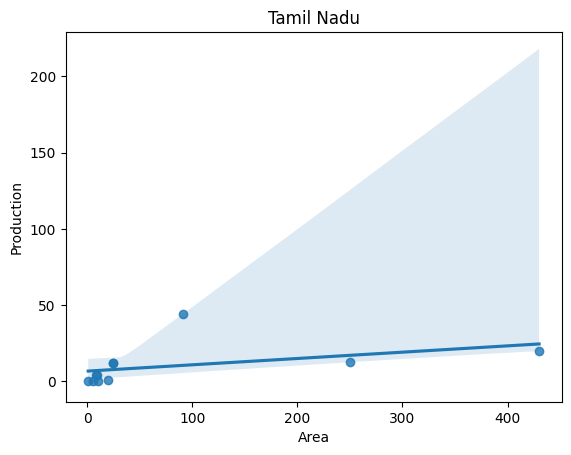

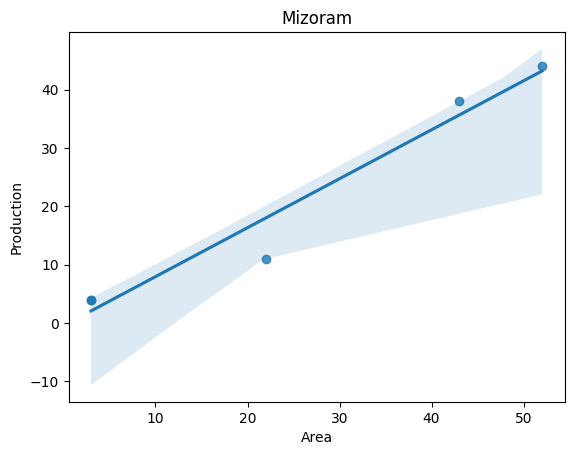

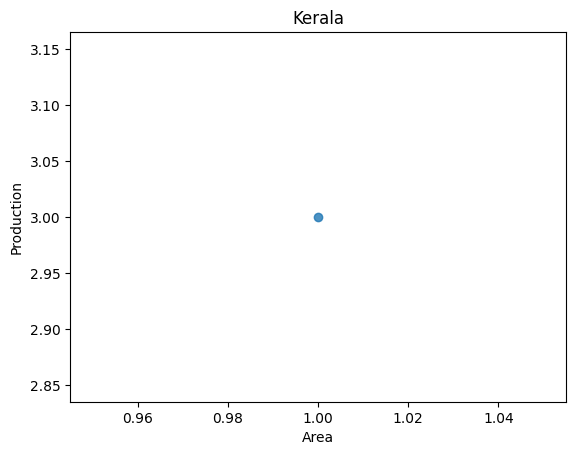

In [68]:
for state in wheat_data.State_Name.unique(): # Function for plotting Area x Production state-wise for Wheat
    data=wheat_data[wheat_data.State_Name == state]
    plt.figure()
    plt.title(state)
    sns.regplot(data=data, x='Area', y='Production', label='Wheat')